In [1]:
import numpy as np
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.models import load_model

# Scaling

In [12]:
# Define your scaling function
def custom_scaling(input_values):
    input_values_scaled = np.zeros_like(input_values, dtype=float)  # Initialize scaled data array
    input_values_scaled[:, 0] = (input_values[:, 0] - L_min) / (L_max - L_min)  # Scale L
    input_values_scaled[:, 1] = (input_values[:, 1] - C_min) / (C_max - C_min)  # Scale C
    input_values_scaled[:, 2] = (input_values[:, 2] - fsw_min) / (fsw_max - fsw_min)  # Scale fsw
    input_values_scaled[:, 3] = (input_values[:, 3] - t_dt_min) / (t_dt_max - t_dt_min) # Scale t_dt
    return input_values_scaled

# Define your scaling function
def custom_scaling_1(input_values):
    input_values_scaled = np.zeros_like(input_values, dtype=float)  # Initialize scaled data array
    input_values_scaled[:, 0] = (input_values[:, 0] - L_min) / (L_max - L_min)  # Scale L
    input_values_scaled[:, 1] = (input_values[:, 1] - C_min) / (C_max - C_min)  # Scale C
    input_values_scaled[:, 2] = (input_values[:, 2] - fsw_min) / (fsw_max - fsw_min)  # Scale fsw
    # input_values_scaled[:, 3] = (input_values[:, 3] - t_dt_min) / (t_dt_max - t_dt_min) # Scale t_dt
    return input_values_scaled

# Split Dataset

 ## Delta current
 

In [13]:


# Fix random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Load your simulation data
# Replace "your_dataset.csv" with the path to your dataset
# df = pd.read_csv(r"D:\Krishna\ai-power-converter\dataset\simulation_results_23x13x13x13.csv")
df_delta_current = pd.read_csv(r"D:\Krishna\ai-power-converter\simulation_results_new_20_20_20_20.csv")
# df_delta_current = pd.read_csv(r"E:\ai-power-converter\simulation_results_new_20_20_20_20.csv")

# Extract input features (L, C, fsw)
X_delta_current = df_delta_current[['L', 'C', 'fsw', "t_dt"]].values

# Extract output (ripples)
y_delta_current = df_delta_current[["delta_current"]].values  # Adjust column names as per your dataset



# Define custom scaling ranges for each input feature
L_min, L_max = 30e-6, 2000e-6
C_min, C_max = 20e-6, 1000e-6
fsw_min, fsw_max = 20e3, 200e3
t_dt_min, t_dt_max = 0.178e-6, 1e-6

X_scaled_delta_current = custom_scaling(X_delta_current)
# print(X_scaled_delta_current[90:])

# Split the dataset into training, validation, and testing sets
X_train_delta_current, X_temp_delta_current, y_train_delta_current, y_temp_delta_current = train_test_split(X_scaled_delta_current, y_delta_current, test_size=0.3, random_state=42)
X_val_delta_current, X_test_delta_current, y_val_delta_current, y_test_delta_current = train_test_split(X_temp_delta_current, y_temp_delta_current, test_size=0.5, random_state=42)

# Define a custom callback to print custom information at the end of each epoch
class PrintEpochInfo(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        print(f"Epoch {epoch+1}/{self.params['epochs']}, Loss: {logs['loss']}, Val Loss: {logs['val_loss']}")


# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=5, verbose=1, mode='auto', restore_best_weights=True)

# Define the learning rate scheduler
lr_scheduler = ReduceLROnPlateau(factor=0.5, patience=3, min_lr=1e-6)# Initialize a dictionary to store the training history for each configuration


histories_delta_current = {}

# Initialize dictionaries to store the evaluation metrics for each configuration
mses_delta_current = {}
maes_delta_current = {}
rmses_delta_current = {}
r2_scores_delta_current = {}
mapes_delta_current = {}

# Define a list of different values for H and Nh to try
H_values = [1, 2, 3, 4, 5, 6]  # Number of hidden layers
Nh_values = [16, 32, 64, 128, 256]  # Number of neurons per hidden layer

Epoch 1/100, Loss: 10.52974796295166, Val Loss: 6.80632209777832
Epoch 2/100, Loss: 7.279175281524658, Val Loss: 4.503571510314941
Epoch 3/100, Loss: 6.694211959838867, Val Loss: 4.261472702026367
Epoch 4/100, Loss: 6.561142921447754, Val Loss: 4.222784042358398
Epoch 5/100, Loss: 6.557495594024658, Val Loss: 4.108861923217773
Epoch 6/100, Loss: 6.4746856689453125, Val Loss: 4.026815891265869
Epoch 7/100, Loss: 6.496545314788818, Val Loss: 4.081430912017822
Epoch 8/100, Loss: 6.451512813568115, Val Loss: 4.032947063446045
Epoch 9/100, Loss: 6.477647304534912, Val Loss: 4.254184246063232
Epoch 10/100, Loss: 6.386872291564941, Val Loss: 4.0785698890686035
Epoch 11/100, Loss: 6.38756799697876, Val Loss: 4.060362815856934
Restoring model weights from the end of the best epoch: 6.
Epoch 11: early stopping
750/750 [==============================] - 0s 479us/step - loss: 4.1076
Epoch 1/100, Loss: 10.4281005859375, Val Loss: 6.416794776916504
Epoch 2/100, Loss: 6.924053192138672, Val Loss: 4.2

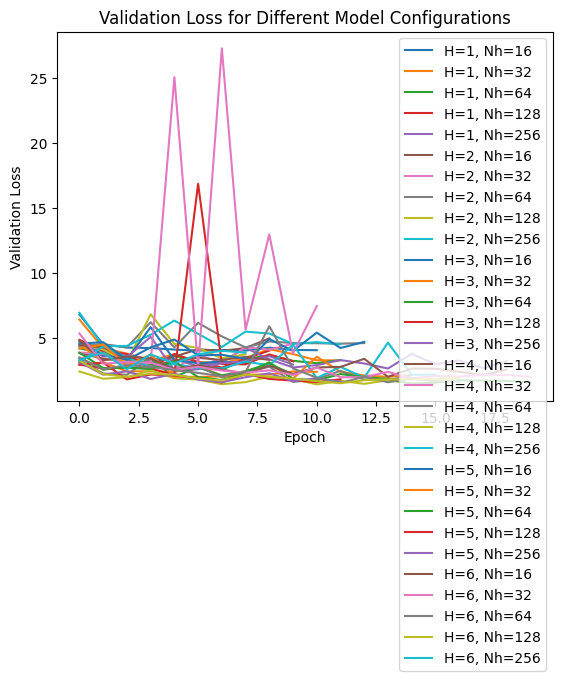

Model with H=1 and Nh=16:
MSE: 4.1075968742370605
MAE: 4.10759705106939
RMSE: 14.823651147082238
R-squared: 0.8813401138107658
MAPE: 34.424106748028464%
Model with H=1 and Nh=32:
MSE: 3.0845723152160645
MAE: 3.084573711938512
RMSE: 9.073827146648215
R-squared: 0.955539477803955
MAPE: 30.340952987180653%
Model with H=1 and Nh=64:
MSE: 2.6061692237854004
MAE: 2.6061688657186517
RMSE: 5.841731691076816
R-squared: 0.9815720609259061
MAPE: 30.15439289733079%
Model with H=1 and Nh=128:
MSE: 2.703568458557129
MAE: 2.7035676652817378
RMSE: 7.26113617240169
R-squared: 0.9715290001930884
MAPE: 34.17094722437915%
Model with H=1 and Nh=256:
MSE: 2.6507859230041504
MAE: 2.6507860295321186
RMSE: 4.915586660098906
R-squared: 0.9869519903418676
MAPE: 36.92261250516602%
Model with H=2 and Nh=16:
MSE: 3.162376880645752
MAE: 3.1623746088088494
RMSE: 7.48543511325095
R-squared: 0.9697428752600685
MAPE: 35.239755205086354%
Model with H=2 and Nh=32:
MSE: 2.698446750640869
MAE: 2.6984487413723315
RMSE: 8.591

In [7]:

# Iterate over different values of H and Nh
for H in H_values:
    for Nh in Nh_values:
        # Initialize a Sequential model
        model_delta_current = tf.keras.Sequential()

        # Add the first hidden layer with batch normalization
        model_delta_current.add(tf.keras.layers.Dense(Nh, activation='relu', input_shape=(4,)))  
        model_delta_current.add(tf.keras.layers.BatchNormalization())

        # Add subsequent hidden layers with batch normalization
        for _ in range(H - 1):
            model_delta_current.add(tf.keras.layers.Dense(Nh, activation='relu'))
            model_delta_current.add(tf.keras.layers.BatchNormalization())

        # Output layer (assuming it follows the hidden layers)
        model_delta_current.add(tf.keras.layers.Dense(1, activation='softplus'))  

        # Compile the model
        model_delta_current.compile(optimizer='adam', loss='mean_absolute_error')

        # Train the model and store the training history
    # Train the model with given hyperparameters
        history_delta_current = model_delta_current.fit(X_train_delta_current, y_train_delta_current, epochs=100, batch_size=32, validation_data=(X_val_delta_current, y_val_delta_current), 
                        callbacks=[PrintEpochInfo(), lr_scheduler, early_stopping], verbose=0)
    
        histories_delta_current[(H, Nh)] = history_delta_current

        # Evaluate the model on the testing set
        predictions_delta_current = model_delta_current.predict(X_test_delta_current)

        # Evaluate the model on the testing set and calculate MSE
        mse_delta_current = model_delta_current.evaluate(X_test_delta_current, y_test_delta_current)
        mses_delta_current[(H, Nh)] = mse_delta_current

        # Calculate Mean Absolute Error (MAE)
        mae_delta_current = mean_absolute_error(y_test_delta_current, predictions_delta_current)
        maes_delta_current[(H, Nh)] = mae_delta_current

        # Calculate Root Mean Squared Error (RMSE)
        rmse_delta_current = np.sqrt(mean_squared_error(y_test_delta_current, predictions_delta_current))
        rmses_delta_current[(H, Nh)] = rmse_delta_current

        # Calculate R-squared (R2) Score
        r2_delta_current = r2_score(y_test_delta_current, predictions_delta_current)
        r2_scores_delta_current[(H, Nh)] = r2_delta_current

        # Calculate Mean Absolute Percentage Error (MAPE)
        mape_delta_current = np.mean(np.abs((y_test_delta_current - predictions_delta_current) / y_test_delta_current)) * 100
        mapes_delta_current[(H, Nh)] = mape_delta_current

# Plot the validation loss for each configuration
for (H, Nh), history_delta_current in histories_delta_current.items():
    plt.plot(history_delta_current.history['val_loss'], label=f'H={H}, Nh={Nh}')

plt.title('Validation Loss for Different Model Configurations')
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.legend()
plt.show()

# Print the MSE for each configuration
# Print the evaluation metrics for each configuration
for (H, Nh), mse_delta_current in mses_delta_current.items():
    print(f'Model with H={H} and Nh={Nh}:')
    print(f'MSE: {mse_delta_current}')
    print(f'MAE: {maes_delta_current[(H, Nh)]}')
    print(f'RMSE: {rmses_delta_current[(H, Nh)]}')
    print(f'R-squared: {r2_scores_delta_current[(H, Nh)]}')
    print(f'MAPE: {mapes_delta_current[(H, Nh)]}%')


In [9]:
# Rank combinations based on their MSE values
ranked_combinations_delta_current = sorted(mses_delta_current.items(), key=lambda x: x[1])

# Print ranked combinations
for idx, ((H, Nh), mse_delta_current) in enumerate(ranked_combinations_delta_current, start=1):
    print(f"Rank {idx}: Combination H={H}, Nh={Nh} - MSE: {mse_delta_current}")


Rank 1: Combination H=5, Nh=64 - MSE: 1.4815806150436401
Rank 2: Combination H=4, Nh=128 - MSE: 1.5006414651870728
Rank 3: Combination H=6, Nh=128 - MSE: 1.5428262948989868
Rank 4: Combination H=6, Nh=64 - MSE: 1.5455348491668701
Rank 5: Combination H=5, Nh=256 - MSE: 1.5969994068145752
Rank 6: Combination H=5, Nh=128 - MSE: 1.6079319715499878
Rank 7: Combination H=4, Nh=64 - MSE: 1.6442921161651611
Rank 8: Combination H=3, Nh=32 - MSE: 1.9077246189117432
Rank 9: Combination H=6, Nh=32 - MSE: 1.9113237857818604
Rank 10: Combination H=3, Nh=64 - MSE: 2.0339584350585938
Rank 11: Combination H=5, Nh=32 - MSE: 2.0343143939971924
Rank 12: Combination H=4, Nh=256 - MSE: 2.059828042984009
Rank 13: Combination H=6, Nh=16 - MSE: 2.0630598068237305
Rank 14: Combination H=3, Nh=128 - MSE: 2.2241811752319336
Rank 15: Combination H=3, Nh=256 - MSE: 2.4846742153167725
Rank 16: Combination H=6, Nh=256 - MSE: 2.5543715953826904
Rank 17: Combination H=1, Nh=64 - MSE: 2.6061692237854004
Rank 18: Combina

In [13]:
# Specify the combination you want to call
H = 5
Nh = 64

# Retrieve the model for the specified combination
selected_model_delta_current = histories_delta_current[(H, Nh)].model
selected_model_delta_current.save("model_5_64_delta_current_28_4.h5")
# Use the trained model to make predictions on the testing set
prediction_delta_current = selected_model_delta_current.predict(X_test_delta_current)
# inverse_prediction = scaler_y_dynamic.inverse_transform(prediction_1)
# print("inverse:", inverse_prediction)

# Evaluate the model on the testing set
mse_1_1 = selected_model_delta_current.evaluate(X_test_delta_current, y_test_delta_current)
print("Mean Squared Error on Testing Set:", mse_1_1)

# Print the first few predictions
print("Predictions:")
print(prediction_delta_current[:5])

# print("Inverse Predictions:")
# print(inverse_prediction[:5])

# y_test_print = scaler_y_dynamic.inverse_transform(y_test_1)
# Print the corresponding true values
print("True Values:")
print(y_test_delta_current[:5])

750/750 [==============================] - 0s 562us/step - loss: 1.4816
Mean Squared Error on Testing Set: 1.4815806150436401
Predictions:
[[ 9.729965 ]
 [ 0.       ]
 [ 6.7532277]
 [ 8.451553 ]
 [19.16468  ]]
True Values:
[[10.31313779]
 [ 1.57412647]
 [ 7.26807243]
 [ 7.08448658]
 [15.36642696]]


 ## Delta current Scaler
  

In [2]:
# Define custom scaling function
def custom_scaling_minmax(X):
    scaled_features = []  # List to store scaled features
    
    # Define custom minimum and maximum values for each feature
    feature_ranges = {
        'L': (30e-6, 2000e-6),
        'C': (20e-6, 1000e-6),
        'fsw': (20e3, 200e3),
        't_dt': (0.178e-6, 1e-6)
    }

    for i, feature_name in enumerate(['L', 'C', 'fsw', 't_dt']):
        # Extract min and max values for the current feature
        feature_min, feature_max = feature_ranges[feature_name]
        
        # Define MinMaxScaler with custom input range
        scaler = MinMaxScaler(feature_range=(0, 1))
        scaler.fit([[feature_min], [feature_max]])
        
        # Transform the current feature using the scaler
        scaled_feature = scaler.transform(X[:, i].reshape(-1, 1))
        
        # Append the scaled feature to the list
        scaled_features.append(scaled_feature)
    
    # Combine the scaled features into a single array
    X_scaled = np.hstack(scaled_features)
    
    return X_scaled
# Apply custom scaling to input features

# df_delta_current_1 = pd.read_csv(r"E:\ai-power-converter\simulation_results_new_20_20_20_20.csv")



# # Extract input features (L, C, fsw)
# X_delta_current_2 = df_delta_current_1[['L', 'C', 'fsw', "t_dt"]].values
# print('ori', X_delta_current_2[-10:])

# X_scaled_delta_current_2 = custom_scaling_2(X_delta_current_2)
# print("Minmaxscaler\n",X_scaled_delta_current_2[-10:])

# X_scaled_delta_current_2 = custom_scaling(X_delta_current_2)
# print("Cusetom\n",X_scaled_delta_current_2[-10:])


In [4]:


# Fix random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Load your simulation data
# Replace "your_dataset.csv" with the path to your dataset
# df = pd.read_csv(r"D:\Krishna\ai-power-converter\dataset\simulation_results_23x13x13x13.csv")
df_delta_current_1 = pd.read_csv(r"D:\Krishna\ai-power-converter\simulation_results_new_20_20_20_20.csv")
# df_delta_current_1 = pd.read_csv(r"E:\ai-power-converter\simulation_results_new_20_20_20_20.csv")

# Extract input features (L, C, fsw)
X_delta_current_1 = df_delta_current_1[['L', 'C', 'fsw', "t_dt"]].values
# print(X_delta_current_1[-10:])

# Extract output (ripples)
y_delta_current_1 = df_delta_current_1[["delta_current"]].values  # Adjust column names as per your dataset

scaler_y_new_20_20_20_20 = MinMaxScaler(feature_range=(0, 1))


# Fit the scaler to your target variable and transform it
y_scaled_delta_current_1 = scaler_y_new_20_20_20_20.fit_transform(y_delta_current_1)

# Define custom scaling ranges for each input feature
L_min, L_max = 30e-6, 2000e-6
C_min, C_max = 20e-6, 1000e-6
fsw_min, fsw_max = 20e3, 200e3
t_dt_min, t_dt_max = 0.178e-6, 1e-6

X_scaled_delta_current_1 = custom_scaling_minmax(X_delta_current_1)
# print(X_scaled_delta_current_1[-10:])

# Split the dataset into training, validation, and testing sets
X_train_delta_current_1, X_temp_delta_current_1, y_train_delta_current_1, y_temp_delta_current_1 = train_test_split(X_scaled_delta_current_1, y_scaled_delta_current_1, test_size=0.3, random_state=42)
X_val_delta_current_1, X_test_delta_current_1, y_val_delta_current_1, y_test_delta_current_1 = train_test_split(X_temp_delta_current_1, y_temp_delta_current_1, test_size=0.5, random_state=42)

# Define a custom callback to print custom information at the end of each epoch
class PrintEpochInfo(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        print(f"Epoch {epoch+1}/{self.params['epochs']}, Loss: {logs['loss']}, Val Loss: {logs['val_loss']}")


# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=5, verbose=1, mode='auto', restore_best_weights=True)

# Define the learning rate scheduler
lr_scheduler = ReduceLROnPlateau(factor=0.5, patience=3, min_lr=1e-6)# Initialize a dictionary to store the training history for each configuration


histories_delta_current_1 = {}

# Initialize dictionaries to store the evaluation metrics for each configuration
mses_delta_current_1 = {}
maes_delta_current_1 = {}
rmses_delta_current_1 = {}
r2_scores_delta_current_1 = {}
mapes_delta_current_1 = {}

# Define a list of different values for H and Nh to try
H_values = [1, 2, 3, 4, 5, 6]  # Number of hidden layers
Nh_values = [16, 32, 64, 128, 256]  # Number of neurons per hidden layer

Epoch 1/100, Loss: 0.03630298376083374, Val Loss: 0.007795677985996008
Epoch 2/100, Loss: 0.006078784819692373, Val Loss: 0.004871548619121313
Epoch 3/100, Loss: 0.005835892166942358, Val Loss: 0.0042450944893062115
Epoch 4/100, Loss: 0.005749738309532404, Val Loss: 0.0036166587378829718
Epoch 5/100, Loss: 0.005791835021227598, Val Loss: 0.007997049018740654
Epoch 6/100, Loss: 0.005589459091424942, Val Loss: 0.004847043659538031
Epoch 7/100, Loss: 0.00558475824072957, Val Loss: 0.003279702737927437
Epoch 8/100, Loss: 0.005499941762536764, Val Loss: 0.0035445743706077337
Epoch 9/100, Loss: 0.005481274798512459, Val Loss: 0.0045484802685678005
Restoring model weights from the end of the best epoch: 4.
Epoch 9: early stopping
750/750 [==============================] - 0s 570us/step - loss: 0.0036
Epoch 1/100, Loss: 0.02909792959690094, Val Loss: 0.005448979791253805
Epoch 2/100, Loss: 0.006145707797259092, Val Loss: 0.005361252464354038
Epoch 3/100, Loss: 0.0055281901732087135, Val Loss: 

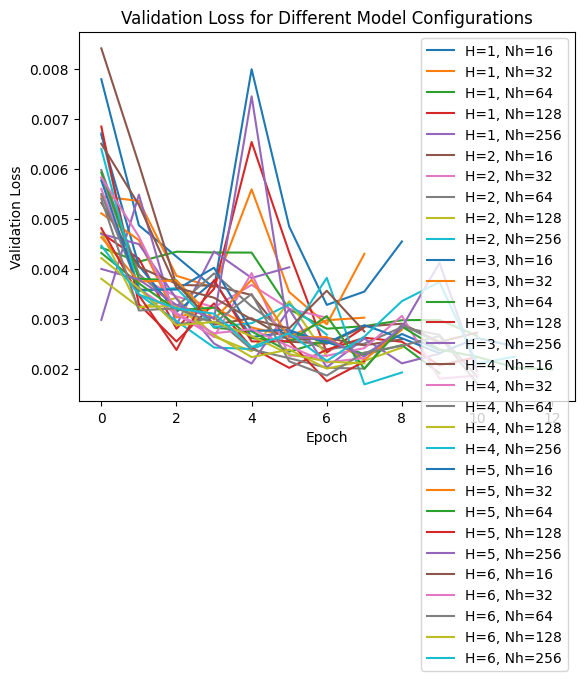

Model with H=1 and Nh=16:
MSE: 0.003621719079092145
MAE: 0.003621719102701256
RMSE: 0.007913570190414245
R-squared: 0.9772541958696336
MAPE: 40.24155230748459%
Model with H=1 and Nh=32:
MSE: 0.0037961311172693968
MAE: 0.003796130851321379
RMSE: 0.01120546728295017
R-squared: 0.9543945945275235
MAPE: 26.569067819616848%
Model with H=1 and Nh=64:
MSE: 0.003177355043590069
MAE: 0.003177357169165531
RMSE: 0.007380711467378413
R-squared: 0.9802142356051345
MAPE: 37.846007302673314%
Model with H=1 and Nh=128:
MSE: 0.0027727417182177305
MAE: 0.002772741245116567
RMSE: 0.006687486054032976
R-squared: 0.9837564048685066
MAPE: 26.241745308190158%
Model with H=1 and Nh=256:
MSE: 0.002970558824017644
MAE: 0.002970559008412327
RMSE: 0.008372837679906917
R-squared: 0.974537460179376
MAPE: 28.37705347534869%
Model with H=2 and Nh=16:
MSE: 0.0025485530495643616
MAE: 0.0025485529833887428
RMSE: 0.006482614902856444
R-squared: 0.984736405350724
MAPE: 21.555815949626048%
Model with H=2 and Nh=32:
MSE: 0.

In [5]:

# Iterate over different values of H and Nh
for H in H_values:
    for Nh in Nh_values:
        # Initialize a Sequential model
        model_delta_current_1 = tf.keras.Sequential()

        # Add the first hidden layer with batch normalization
        model_delta_current_1.add(tf.keras.layers.Dense(Nh, activation='relu', input_shape=(4,)))  
        model_delta_current_1.add(tf.keras.layers.BatchNormalization())

        # Add subsequent hidden layers with batch normalization
        for _ in range(H - 1):
            model_delta_current_1.add(tf.keras.layers.Dense(Nh, activation='relu'))
            model_delta_current_1.add(tf.keras.layers.BatchNormalization())

        # Output layer (assuming it follows the hidden layers)
        model_delta_current_1.add(tf.keras.layers.Dense(1, activation='softplus'))  

        # Compile the model
        model_delta_current_1.compile(optimizer='adam', loss='mean_absolute_error')

        # Train the model and store the training history
    # Train the model with given hyperparameters
        history_delta_current_1 = model_delta_current_1.fit(X_train_delta_current_1, y_train_delta_current_1, epochs=100, batch_size=32, validation_data=(X_val_delta_current_1, y_val_delta_current_1), 
                        callbacks=[PrintEpochInfo(), lr_scheduler, early_stopping], verbose=0)
    
        histories_delta_current_1[(H, Nh)] = history_delta_current_1

        # Evaluate the model on the testing set
        predictions_delta_current_1 = model_delta_current_1.predict(X_test_delta_current_1)

        # Evaluate the model on the testing set and calculate MSE
        mse_delta_current_1 = model_delta_current_1.evaluate(X_test_delta_current_1, y_test_delta_current_1)
        mses_delta_current_1[(H, Nh)] = mse_delta_current_1

        # Calculate Mean Absolute Error (MAE)
        mae_delta_current_1 = mean_absolute_error(y_test_delta_current_1, predictions_delta_current_1)
        maes_delta_current_1[(H, Nh)] = mae_delta_current_1

        # Calculate Root Mean Squared Error (RMSE)
        rmse_delta_current_1 = np.sqrt(mean_squared_error(y_test_delta_current_1, predictions_delta_current_1))
        rmses_delta_current_1[(H, Nh)] = rmse_delta_current_1

        # Calculate R-squared (R2) Score
        r2_delta_current_1 = r2_score(y_test_delta_current_1, predictions_delta_current_1)
        r2_scores_delta_current_1[(H, Nh)] = r2_delta_current_1

        # Calculate Mean Absolute Percentage Error (MAPE)
        mape_delta_current_1 = np.mean(np.abs((y_test_delta_current_1 - predictions_delta_current_1) / y_test_delta_current_1)) * 100
        mapes_delta_current_1[(H, Nh)] = mape_delta_current_1

# Plot the validation loss for each configuration
for (H, Nh), history_delta_current_1 in histories_delta_current_1.items():
    plt.plot(history_delta_current_1.history['val_loss'], label=f'H={H}, Nh={Nh}')

plt.title('Validation Loss for Different Model Configurations')
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.legend()
plt.show()

# Print the MSE for each configuration
# Print the evaluation metrics for each configuration
for (H, Nh), mse_delta_current_1 in mses_delta_current_1.items():
    print(f'Model with H={H} and Nh={Nh}:')
    print(f'MSE: {mse_delta_current_1}')
    print(f'MAE: {maes_delta_current_1[(H, Nh)]}')
    print(f'RMSE: {rmses_delta_current_1[(H, Nh)]}')
    print(f'R-squared: {r2_scores_delta_current_1[(H, Nh)]}')
    print(f'MAPE: {mapes_delta_current_1[(H, Nh)]}%')


In [6]:
# Rank combinations based on their MSE values
ranked_combinations_delta_current_1 = sorted(mses_delta_current_1.items(), key=lambda x: x[1])

# Print ranked combinations
for idx, ((H, Nh), mse_delta_current_1) in enumerate(ranked_combinations_delta_current_1, start=1):
    print(f"Rank {idx}: Combination H={H}, Nh={Nh} - MSE: {mse_delta_current_1}")


Rank 1: Combination H=3, Nh=128 - MSE: 0.0019857247825711966
Rank 2: Combination H=5, Nh=64 - MSE: 0.002012974349781871
Rank 3: Combination H=3, Nh=256 - MSE: 0.002151294145733118
Rank 4: Combination H=6, Nh=64 - MSE: 0.002154913730919361
Rank 5: Combination H=6, Nh=256 - MSE: 0.0021742440294474363
Rank 6: Combination H=4, Nh=32 - MSE: 0.002282923785969615
Rank 7: Combination H=4, Nh=64 - MSE: 0.002398289740085602
Rank 8: Combination H=5, Nh=128 - MSE: 0.0024123333860188723
Rank 9: Combination H=2, Nh=256 - MSE: 0.0024419589899480343
Rank 10: Combination H=2, Nh=16 - MSE: 0.0025485530495643616
Rank 11: Combination H=5, Nh=16 - MSE: 0.0025903056375682354
Rank 12: Combination H=3, Nh=16 - MSE: 0.0026634333189576864
Rank 13: Combination H=5, Nh=256 - MSE: 0.002677751239389181
Rank 14: Combination H=4, Nh=128 - MSE: 0.0027130788657814264
Rank 15: Combination H=2, Nh=64 - MSE: 0.0027145904023200274
Rank 16: Combination H=3, Nh=64 - MSE: 0.0027616366278380156
Rank 17: Combination H=1, Nh=128

In [7]:
# Specify the combination you want to call
H = 3
Nh = 128

# Retrieve the model for the specified combination
selected_model_delta_current_1 = histories_delta_current_1[(H, Nh)].model
selected_model_delta_current_1.save("model_3_128_delta_current_scaler.h5")
# Use the trained model to make predictions on the testing set
prediction_delta_current_1 = selected_model_delta_current_1.predict(X_test_delta_current_1)
inverse_prediction_delta_current_1 = scaler_y_new_20_20_20_20.inverse_transform(prediction_delta_current_1)
# print("inverse:", inverse_prediction)

# Evaluate the model on the testing set
mse_delta_current_1_1 = selected_model_delta_current_1.evaluate(X_test_delta_current_1, y_test_delta_current_1)
print("Mean Squared Error on Testing Set:", mse_delta_current_1_1)

# Print the first few predictions
print("Predictions:")
print(prediction_delta_current_1[:5])

print("Inverse Predictions:")
print(inverse_prediction_delta_current_1[:5])

y_test_print_delta_current_1 = scaler_y_new_20_20_20_20.inverse_transform(y_test_delta_current_1)
# Print the corresponding true values
print("True Values:")
print(y_test_print_delta_current_1[:5])

177/750 [======>.......................] - ETA: 0s

d:\Software\Python\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


750/750 [==============================] - 0s 572us/step - loss: 0.0020
Mean Squared Error on Testing Set: 0.0019857247825711966
Predictions:
[[1.2439947e-02]
 [6.7402900e-05]
 [7.6713972e-03]
 [9.1158682e-03]
 [2.3763459e-02]]
Inverse Predictions:
[[11.270684]
 [ 1.12362 ]
 [ 7.359865]
 [ 8.544516]
 [20.55741 ]]
True Values:
[[10.31313779]
 [ 1.57412647]
 [ 7.26807243]
 [ 7.08448658]
 [15.36642696]]


In [17]:
model_default_delta_current = load_model(r"D:\Krishna\ai-power-converter-1\machine-learning\model_5_64_delta_current_28_4.h5")
model_minmax_delta_current = load_model(r"D:\Krishna\ai-power-converter-1\machine-learning\model_3_128_delta_current_scaler.h5")

prediction_default = model_default_delta_current.predict(X_test_delta_current)
prediction_minmax = model_minmax_delta_current.predict(X_test_delta_current_1)

inverse_prediction_delta_current = scaler_y_new_20_20_20_20.inverse_transform(prediction_minmax)
print("inverse:", inverse_prediction_delta_current)


# Print the first few predictions
print("Predictions:")
print(prediction_default[:5])

print("Inverse Predictions:")
print(inverse_prediction_delta_current[:5])


# Print the corresponding true values
print("True Values:")
print(y_test_delta_current[:5])

# Calculate mean squared error for prediction_default
mse_default_delta_current = mean_squared_error(y_test_delta_current, prediction_default)

# Calculate mean squared error for inverse_prediction
mse_inverse_delta_current = mean_squared_error(y_test_delta_current, inverse_prediction_delta_current)

# Calculate Root Mean Squared Error (RMSE)
rmse_default_delta_current = np.sqrt(mean_squared_error(y_test_delta_current, prediction_default))
rmse_inverse_delta_current = np.sqrt(mean_squared_error(y_test_delta_current, inverse_prediction_delta_current))

# Calculate overall Mean Squared Error (MSE)
overall_mse_default_delta_current = np.mean((y_test_delta_current - prediction_default) ** 2)
overall_mse_inverse_delta_current = np.mean((y_test_delta_current - inverse_prediction_delta_current) ** 2)

print("Overall Mean Squared Error for prediction_default:", overall_mse_default_delta_current)
print("Overall Mean Squared Error for inverse_prediction:", overall_mse_inverse_delta_current)


print("Mean Squared Error for prediction_default:", mse_default_delta_current)
print("Mean Squared Error for inverse_prediction:", mse_inverse_delta_current)

print("Root Mean Squared Error for prediction_default:", rmse_default_delta_current)
print("Root Mean Squared Error for inverse_prediction:", rmse_inverse_delta_current)


750/750 [==============================] - 0s 542us/step
inverse: [[11.270684]
 [ 1.12362 ]
 [ 7.359865]
 ...
 [17.965076]
 [ 6.479322]
 [93.959984]]
Predictions:
[[ 9.729965 ]
 [ 0.       ]
 [ 6.7532277]
 [ 8.451553 ]
 [19.16468  ]]
Inverse Predictions:
[[11.270684]
 [ 1.12362 ]
 [ 7.359865]
 [ 8.544516]
 [20.55741 ]]
True Values:
[[10.31313779]
 [ 1.57412647]
 [ 7.26807243]
 [ 7.08448658]
 [15.36642696]]
Overall Mean Squared Error for prediction_default: 25.51306395713918
Overall Mean Squared Error for inverse_prediction: 38.616987587916064
Mean Squared Error for prediction_default: 25.51306395713918
Mean Squared Error for inverse_prediction: 38.616987587916064
Root Mean Squared Error for prediction_default: 5.051045828057708
Root Mean Squared Error for inverse_prediction: 6.21425680093091


## Delta voltage

In [ ]:


# Fix random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Load your simulation data
# Replace "your_dataset.csv" with the path to your dataset
df_delta_voltage = pd.read_csv(r"E:\ai-power-converter\simulation_results_new_20_20_20_20.csv")
# df_delta_voltage = pd.read_csv(r"D:\Krishna\ai-power-converter\simulation_results_new_20_20_20_20.csv")

# Extract input features (L, C, fsw)
X_delta_voltage = df_delta_voltage[['L', 'C', 'fsw', "t_dt"]].values

# Extract output (ripples)
y_delta_voltage = df_delta_voltage[["delta_voltage"]].values  # Adjust column names as per your dataset

# Define custom scaling ranges for each input feature
L_min, L_max = 30e-6, 2000e-6
C_min, C_max = 20e-6, 1000e-6
fsw_min, fsw_max = 20e3, 200e3
t_dt_min, t_dt_max = 0.178e-6, 1e-6

X_scaled = custom_scaling(X)
print(X_scaled[90:])

# Split the dataset into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y_delta_voltage, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Define a custom callback to print custom information at the end of each epoch
class PrintEpochInfo(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        print(f"Epoch {epoch+1}/{self.params['epochs']}, Loss: {logs['loss']}, Val Loss: {logs['val_loss']}")


# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=5, verbose=1, mode='auto', restore_best_weights=True)

# Define the learning rate scheduler
lr_scheduler = ReduceLROnPlateau(factor=0.5, patience=3, min_lr=1e-6)# Initialize a dictionary to store the training history for each configuration


histories_delta_voltage = {}

# Initialize dictionaries to store the evaluation metrics for each configuration
mses_delta_voltage = {}
maes_delta_voltage = {}
rmses_delta_voltage = {}
r2_scores_delta_voltage = {}
mapes_delta_voltage = {}

# Define a list of different values for H and Nh to try
H_values = [1, 2, 3, 4, 5, 6]  # Number of hidden layers
Nh_values = [16, 32, 64, 128, 256]  # Number of neurons per hidden layer

In [ ]:

# Iterate over different values of H and Nh
for H in H_values:
    for Nh in Nh_values:
        # Initialize a Sequential model
        model_delta_voltage = tf.keras.Sequential()

        # Add the first hidden layer with batch normalization
        model_delta_voltage.add(tf.keras.layers.Dense(Nh, activation='relu', input_shape=(4,)))  
        model_delta_voltage.add(tf.keras.layers.BatchNormalization())

        # Add subsequent hidden layers with batch normalization
        for _ in range(H - 1):
            model_delta_voltage.add(tf.keras.layers.Dense(Nh, activation='relu'))
            model_delta_voltage.add(tf.keras.layers.BatchNormalization())

        # Output layer (assuming it follows the hidden layers)
        model_delta_voltage.add(tf.keras.layers.Dense(1, activation='softplus'))  

        # Compile the model
        model_delta_voltage.compile(optimizer='adam', loss='mean_absolute_error')

        # Train the model and store the training history
    # Train the model with given hyperparameters
        history_delta_voltage = model_delta_voltage.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val), 
                        callbacks=[PrintEpochInfo(), lr_scheduler, early_stopping], verbose=0)
    
        histories_delta_voltage[(H, Nh)] = history_delta_voltage

        # Evaluate the model on the testing set
        predictions_delta_voltage = model_delta_voltage.predict(X_test)

        # Evaluate the model on the testing set and calculate MSE
        mse_delta_voltage = model_delta_voltage.evaluate(X_test, y_test)
        mses_delta_voltage[(H, Nh)] = mse_delta_voltage

        # Calculate Mean Absolute Error (MAE)
        mae_delta_voltage = mean_absolute_error(y_test, predictions_delta_voltage)
        maes_delta_voltage[(H, Nh)] = mae_delta_voltage

        # Calculate Root Mean Squared Error (RMSE)
        rmse_delta_voltage = np.sqrt(mean_squared_error(y_test, predictions_delta_voltage))
        rmses_delta_voltage[(H, Nh)] = rmse_delta_voltage

        # Calculate R-squared (R2) Score
        r2_delta_voltage = r2_score(y_test, predictions_delta_voltage)
        r2_scores_delta_voltage[(H, Nh)] = r2_delta_voltage

        # Calculate Mean Absolute Percentage Error (MAPE)
        mape_delta_voltage = np.mean(np.abs((y_test - predictions_delta_voltage) / y_test)) * 100
        mapes_delta_voltage[(H, Nh)] = mape_delta_voltage

# Plot the validation loss for each configuration
for (H, Nh), history_delta_voltage in histories_delta_voltage.items():
    plt.plot(history_delta_voltage.history['val_loss'], label=f'H={H}, Nh={Nh}')

plt.title('Validation Loss for Different Model Configurations')
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.legend()
plt.show()

# Print the MSE for each configuration
# Print the evaluation metrics for each configuration
for (H, Nh), mse_delta_voltage in mses_delta_voltage.items():
    print(f'Model with H={H} and Nh={Nh}:')
    print(f'MSE: {mse_delta_voltage}')
    print(f'MAE: {maes_delta_voltage[(H, Nh)]}')
    print(f'RMSE: {rmses_delta_voltage[(H, Nh)]}')
    print(f'R-squared: {r2_scores_delta_voltage[(H, Nh)]}')
    print(f'MAPE: {mapes_delta_voltage[(H, Nh)]}%')


In [ ]:
# Rank combinations based on their MSE values
ranked_combinations_delta_voltage = sorted(mses_delta_voltage.items(), key=lambda x: x[1])

# Print ranked combinations
for idx, ((H, Nh), mse_delta_voltage) in enumerate(ranked_combinations_delta_voltage, start=1):
    print(f"Rank {idx}: Combination H={H}, Nh={Nh} - MSE: {mse_delta_voltage}")


In [ ]:
# Specify the combination you want to call
H = 3
Nh = 256

# Retrieve the model for the specified combination
selected_model_delta_voltage = histories_delta_voltage[(H, Nh)].model
selected_model_delta_voltage.save("model_3_256_delta_voltage.h5")
# Use the trained model to make predictions on the testing set
prediction_delta_voltage = selected_model_delta_voltage.predict(X_test)

# Evaluate the model on the testing set
mse_delta_voltage_2 = selected_model_delta_voltage.evaluate(X_test, y_test)
print("Mean Squared Error on Testing Set:", mse_delta_voltage_2)

# Print the first few predictions
print("Predictions:")
print(prediction_delta_voltage[:5])

# Print the corresponding true values
print("True Values:")
print(y_test[:5])

## Delta voltage scaler

In [ ]:


# Fix random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Load your simulation data
# Replace "your_dataset.csv" with the path to your dataset
# df = pd.read_csv(r"D:\Krishna\ai-power-converter\dataset\simulation_results_23x13x13x13.csv")
# df_delta_voltage_1 = pd.read_csv(r"D:\Krishna\ai-power-converter\simulation_results_new_20_20_20_20.csv")
df_delta_voltage_1 = pd.read_csv(r"E:\ai-power-converter\simulation_results_new_20_20_20_20.csv")

# Extract input features (L, C, fsw)
X_delta_voltage_1 = df_delta_voltage_1[['L', 'C', 'fsw', "t_dt"]].values
# print(X_delta_voltage_1[-10:])

# Extract output (ripples)
y_delta_voltage_1 = df_delta_voltage_1[["delta_voltage"]].values  # Adjust column names as per your dataset

scaler_y_new_20_20_20_20 = MinMaxScaler(feature_range=(0, 1))


# Fit the scaler to your target variable and transform it
y_scaled_delta_voltage_1 = scaler_y_new_20_20_20_20.fit_transform(y_delta_voltage_1)

# Define custom scaling ranges for each input feature
L_min, L_max = 30e-6, 2000e-6
C_min, C_max = 20e-6, 1000e-6
fsw_min, fsw_max = 20e3, 200e3
t_dt_min, t_dt_max = 0.178e-6, 1e-6

X_scaled_delta_voltage_1 = custom_scaling_minmax(X_delta_voltage_1)
# print(X_scaled_delta_voltage_1[-10:])

# Split the dataset into training, validation, and testing sets
X_train_delta_voltage_1, X_temp_delta_voltage_1, y_train_delta_voltage_1, y_temp_delta_voltage_1 = train_test_split(X_scaled_delta_voltage_1, y_scaled_delta_voltage_1, test_size=0.3, random_state=42)
X_val_delta_voltage_1, X_test_delta_voltage_1, y_val_delta_voltage_1, y_test_delta_voltage_1 = train_test_split(X_temp_delta_voltage_1, y_temp_delta_voltage_1, test_size=0.5, random_state=42)

# Define a custom callback to print custom information at the end of each epoch
class PrintEpochInfo(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        print(f"Epoch {epoch+1}/{self.params['epochs']}, Loss: {logs['loss']}, Val Loss: {logs['val_loss']}")


# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=5, verbose=1, mode='auto', restore_best_weights=True)

# Define the learning rate scheduler
lr_scheduler = ReduceLROnPlateau(factor=0.5, patience=3, min_lr=1e-6)# Initialize a dictionary to store the training history for each configuration


histories_delta_voltage_1 = {}

# Initialize dictionaries to store the evaluation metrics for each configuration
mses_delta_voltage_1 = {}
maes_delta_voltage_1 = {}
rmses_delta_voltage_1 = {}
r2_scores_delta_voltage_1 = {}
mapes_delta_voltage_1 = {}

# Define a list of different values for H and Nh to try
H_values = [1, 2, 3, 4, 5, 6]  # Number of hidden layers
Nh_values = [16, 32, 64, 128, 256]  # Number of neurons per hidden layer

In [ ]:

# Iterate over different values of H and Nh
for H in H_values:
    for Nh in Nh_values:
        # Initialize a Sequential model
        model_delta_voltage_1 = tf.keras.Sequential()

        # Add the first hidden layer with batch normalization
        model_delta_voltage_1.add(tf.keras.layers.Dense(Nh, activation='relu', input_shape=(4,)))  
        model_delta_voltage_1.add(tf.keras.layers.BatchNormalization())

        # Add subsequent hidden layers with batch normalization
        for _ in range(H - 1):
            model_delta_voltage_1.add(tf.keras.layers.Dense(Nh, activation='relu'))
            model_delta_voltage_1.add(tf.keras.layers.BatchNormalization())

        # Output layer (assuming it follows the hidden layers)
        model_delta_voltage_1.add(tf.keras.layers.Dense(1, activation='softplus'))  

        # Compile the model
        model_delta_voltage_1.compile(optimizer='adam', loss='mean_absolute_error')

        # Train the model and store the training history
    # Train the model with given hyperparameters
        history_delta_voltage_1 = model_delta_voltage_1.fit(X_train_delta_voltage_1, y_train_delta_voltage_1, epochs=100, batch_size=32, validation_data=(X_val_delta_voltage_1, y_val_delta_voltage_1), 
                        callbacks=[PrintEpochInfo(), lr_scheduler, early_stopping], verbose=0)
    
        histories_delta_voltage_1[(H, Nh)] = history_delta_voltage_1

        # Evaluate the model on the testing set
        predictions_delta_voltage_1 = model_delta_voltage_1.predict(X_test_delta_voltage_1)

        # Evaluate the model on the testing set and calculate MSE
        mse_delta_voltage_1 = model_delta_voltage_1.evaluate(X_test_delta_voltage_1, y_test_delta_voltage_1)
        mses_delta_voltage_1[(H, Nh)] = mse_delta_voltage_1

        # Calculate Mean Absolute Error (MAE)
        mae_delta_voltage_1 = mean_absolute_error(y_test_delta_voltage_1, predictions_delta_voltage_1)
        maes_delta_voltage_1[(H, Nh)] = mae_delta_voltage_1

        # Calculate Root Mean Squared Error (RMSE)
        rmse_delta_voltage_1 = np.sqrt(mean_squared_error(y_test_delta_voltage_1, predictions_delta_voltage_1))
        rmses_delta_voltage_1[(H, Nh)] = rmse_delta_voltage_1

        # Calculate R-squared (R2) Score
        r2_delta_voltage_1 = r2_score(y_test_delta_voltage_1, predictions_delta_voltage_1)
        r2_scores_delta_voltage_1[(H, Nh)] = r2_delta_voltage_1

        # Calculate Mean Absolute Percentage Error (MAPE)
        mape_delta_voltage_1 = np.mean(np.abs((y_test_delta_voltage_1 - predictions_delta_voltage_1) / y_test_delta_voltage_1)) * 100
        mapes_delta_voltage_1[(H, Nh)] = mape_delta_voltage_1

# Plot the validation loss for each configuration
for (H, Nh), history_delta_voltage_1 in histories_delta_voltage_1.items():
    plt.plot(history_delta_voltage_1.history['val_loss'], label=f'H={H}, Nh={Nh}')

plt.title('Validation Loss for Different Model Configurations')
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.legend()
plt.show()

# Print the MSE for each configuration
# Print the evaluation metrics for each configuration
for (H, Nh), mse_delta_voltage_1 in mses_delta_voltage_1.items():
    print(f'Model with H={H} and Nh={Nh}:')
    print(f'MSE: {mse_delta_voltage_1}')
    print(f'MAE: {maes_delta_voltage_1[(H, Nh)]}')
    print(f'RMSE: {rmses_delta_voltage_1[(H, Nh)]}')
    print(f'R-squared: {r2_scores_delta_voltage_1[(H, Nh)]}')
    print(f'MAPE: {mapes_delta_voltage_1[(H, Nh)]}%')


In [ ]:
# Rank combinations based on their MSE values
ranked_combinations_delta_voltage_1 = sorted(mses_delta_voltage_1.items(), key=lambda x: x[1])

# Print ranked combinations
for idx, ((H, Nh), mse_delta_voltage_1) in enumerate(ranked_combinations_delta_voltage_1, start=1):
    print(f"Rank {idx}: Combination H={H}, Nh={Nh} - MSE: {mse_delta_voltage_1}")


In [ ]:
# Specify the combination you want to call
H = 4
Nh = 64

# Retrieve the model for the specified combination
selected_model_delta_voltage_1 = histories_delta_voltage_1[(H, Nh)].model
selected_model_delta_voltage_1.save("model_4_64_delta_current.h5")
# Use the trained model to make predictions on the testing set
prediction_delta_voltage_1 = selected_model_delta_voltage_1.predict(X_test_delta_voltage_1)
inverse_prediction_delta_voltage_1 = scaler_y_new_20_20_20_20.inverse_transform(prediction_delta_voltage_1)
# print("inverse:", inverse_prediction)

# Evaluate the model on the testing set
mse_delta_voltage_1_1 = selected_model_delta_voltage_1.evaluate(X_test_delta_voltage_1, y_test_delta_voltage_1)
print("Mean Squared Error on Testing Set:", mse_delta_voltage_1_1)

# Print the first few predictions
print("Predictions:")
print(prediction_delta_voltage_1[:5])

print("Inverse Predictions:")
print(inverse_prediction_delta_voltage_1[:5])

y_test_print_delta_voltage_1 = scaler_y_new_20_20_20_20.inverse_transform(y_test_delta_voltage_1)
# Print the corresponding true values
print("True Values:")
print(y_test_print_delta_voltage_1[:5])

In [ ]:
model_default_delta_voltage = load_model(r"E:\ai-power-converter\machine-learning\model_4_128_delta_voltage_2.h5")
model_minmax_delta_voltage = load_model(r"E:\ai-power-converter\machine-learning\model_5_256_delta_voltage_test.h5")

prediction_default = model_default_delta_voltage.predict(X_test_delta_voltage_1)
prediction_minmax = model_minmax_delta_voltage.predict(X_test_delta_voltage_1)

inverse_prediction_delta_voltage = scaler_y_new_20_20_20_20.inverse_transform(prediction_minmax)
print("inverse:", inverse_prediction_delta_voltage)


# Print the first few predictions
print("Predictions:")
print(prediction_default[:10])

print("Inverse Predictions:")
print(inverse_prediction_delta_voltage[:10])


# Print the corresponding true values
print("True Values:")
print(y_test_delta_voltage_1[:10])

# Calculate mean squared error for prediction_default
mse_default_delta_voltage = mean_squared_error(y_test_delta_voltage_1, prediction_default)

# Calculate mean squared error for inverse_prediction
mse_inverse_delta_voltage = mean_squared_error(y_test_delta_voltage_1, inverse_prediction_delta_voltage)

print("Mean Squared Error for prediction_default:", mse_default_delta_voltage)
print("Mean Squared Error for inverse_prediction:", mse_inverse_delta_voltage)

## Pl_s1, Pl_s2

In [ ]:


# Fix random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Load your simulation data
# Replace "your_dataset.csv" with the path to your dataset
# df = pd.read_csv(r"D:\Krishna\ai-power-converter\dataset\simulation_results_33x13x13x13.csv")
df_Pl_s1 = pd.read_csv(r"D:\Krishna\ai-power-converter\simulation_results_new_20_20_20_20.csv")

# Extract input features (L, C, fsw)
X_Pl_s1 = df_Pl_s1[['L', 'C', 'fsw', "t_dt"]].values

# Extract output (ripples)
y_Pl_s1 = df_Pl_s1[["Pl_s1", "Pl_s2"]].values  # Adjust column names as per your dataset

# Define custom scaling ranges for each input feature
L_min, L_max = 30e-6, 2000e-6
C_min, C_max = 20e-6, 1000e-6
fsw_min, fsw_max = 20e3, 200e3
t_dt_min, t_dt_max = 0.178e-6, 1e-6

X_scaled_Pl_s1 = custom_scaling(X_Pl_s1)
print(X_scaled_Pl_s1[90:])

# Split the dataset into training, validation, and testing sets
X_train_Pl_s1, X_temp_Pl_s1, y_train_Pl_s1, y_temp_Pl_s1 = train_test_split(X_scaled, y_Pl_s1, test_size=0.3, random_state=42)
X_val_Pl_s1, X_test_Pl_s1, y_val_Pl_s1, y_test_Pl_s1 = train_test_split(X_temp_Pl_s1, y_temp_Pl_s1, test_size=0.5, random_state=42)

# Define a custom callback to print custom information at the end of each epoch
class PrintEpochInfo(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        print(f"Epoch {epoch+1}/{self.params['epochs']}, Loss: {logs['loss']}, Val Loss: {logs['val_loss']}")


# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=5, verbose=1, mode='auto', restore_best_weights=True)

# Define the learning rate scheduler
lr_scheduler = ReduceLROnPlateau(factor=0.5, patience=3, min_lr=1e-6)# Initialize a dictionary to store the training history for each configuration


histories_Pl_s1 = {}

# Initialize dictionaries to store the evaluation metrics for each configuration
mses_Pl_s1 = {}
maes_Pl_s1 = {}
rmses_Pl_s1 = {}
r2_scores_Pl_s1 = {}
mapes_Pl_s1 = {}

# Define a list of different values for H and Nh to try
H_values = [1, 2, 3, 4, 5, 6]  # Number of hidden layers
Nh_values = [16, 32, 64, 128, 256]  # Number of neurons per hidden layer

In [ ]:

# Iterate over different values of H and Nh
for H in H_values:
    for Nh in Nh_values:
        # Initialize a Sequential model
        model_Pl_s1 = tf.keras.Sequential()

        # Add the first hidden layer with batch normalization
        model_Pl_s1.add(tf.keras.layers.Dense(Nh, activation='relu', input_shape=(4,)))  
        model_Pl_s1.add(tf.keras.layers.BatchNormalization())

        # Add subsequent hidden layers with batch normalization
        for _ in range(H - 1):
            model_Pl_s1.add(tf.keras.layers.Dense(Nh, activation='relu'))
            model_Pl_s1.add(tf.keras.layers.BatchNormalization())

        # Output layer (assuming it follows the hidden layers)
        model_Pl_s1.add(tf.keras.layers.Dense(2, activation='softplus'))  

        # Compile the model
        model_Pl_s1.compile(optimizer='adam', loss='mean_absolute_error')

        # Train the model and store the training history
    # Train the model with given hyperparameters
        history_Pl_s1 = model_Pl_s1.fit(X_train_Pl_s1, y_train_Pl_s1, epochs=100, batch_size=32, validation_data=(X_val_Pl_s1, y_val_Pl_s1), 
                        callbacks=[PrintEpochInfo(), lr_scheduler, early_stopping], verbose=0)
    
        histories_Pl_s1[(H, Nh)] = history_Pl_s1

        # Evaluate the model on the testing set
        predictions_Pl_s1 = model_Pl_s1.predict(X_test_Pl_s1)

        # Evaluate the model on the testing set and calculate MSE
        mse_Pl_s1 = model_Pl_s1.evaluate(X_test_Pl_s1, y_test_Pl_s1)
        mses_Pl_s1[(H, Nh)] = mse_Pl_s1

        # Calculate Mean Absolute Error (MAE)
        mae_Pl_s1 = mean_absolute_error(y_test_Pl_s1, predictions_Pl_s1)
        maes_Pl_s1[(H, Nh)] = mae_Pl_s1

        # Calculate Root Mean Squared Error (RMSE)
        rmse_Pl_s1 = np.sqrt(mean_squared_error(y_test_Pl_s1, predictions_Pl_s1))
        rmses_Pl_s1[(H, Nh)] = rmse_Pl_s1

        # Calculate R-squared (R2) Score
        r2_Pl_s1 = r2_score(y_test_Pl_s1, predictions_Pl_s1)
        r2_scores_Pl_s1[(H, Nh)] = r2_Pl_s1

        # Calculate Mean Absolute Percentage Error (MAPE)
        mape_Pl_s1 = np.mean(np.abs((y_test_Pl_s1 - predictions_Pl_s1) / y_test_Pl_s1)) * 100
        mapes_Pl_s1[(H, Nh)] = mape_Pl_s1

# Plot the validation loss for each configuration
for (H, Nh), history_Pl_s1 in histories_Pl_s1.items():
    plt.plot(history_Pl_s1.history['val_loss'], label=f'H={H}, Nh={Nh}')

plt.title('Validation Loss for Different Model Configurations')
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.legend()
plt.show()

# Print the MSE for each configuration
# Print the evaluation metrics for each configuration
for (H, Nh), mse_Pl_s1 in mses_Pl_s1.items():
    print(f'Model with H={H} and Nh={Nh}:')
    print(f'MSE: {mse_Pl_s1}')
    print(f'MAE: {maes_Pl_s1[(H, Nh)]}')
    print(f'RMSE: {rmses_Pl_s1[(H, Nh)]}')
    print(f'R-squared: {r2_scores_Pl_s1[(H, Nh)]}')
    print(f'MAPE: {mapes_Pl_s1[(H, Nh)]}%')


In [ ]:
# Rank combinations based on their MSE values
ranked_combinations_Pl_s1 = sorted(mses_Pl_s1.items(), key=lambda x: x[1])
# Print ranked combinations
for idx, ((H, Nh), mse_Pl_s1) in enumerate(ranked_combinations_Pl_s1, start=1):
    print(f"Rank {idx}: Combination H={H}, Nh={Nh} - MSE: {mse_Pl_s1}")


In [ ]:
# Specify the combination you want to call
H = 2
Nh = 128

# Retrieve the model for the specified combination
selected_model_Pl_s1 = histories_Pl_s1[(H, Nh)].model
selected_model_Pl_s1.save("model_2_128_Pls1_Pls2.h5")
# Use the trained model to make predictions on the testing set
prediction_Pl_s1 = selected_model_Pl_s1.predict(X_test_Pl_s1)

# Evaluate the model on the testing set
mse_Pl_s1_3 = selected_model_Pl_s1.evaluate(X_test_Pl_s1, y_test_Pl_s1)
print("Mean Squared Error on Testing Set:", mse_Pl_s1_3)

# Print the first few predictions
print("Predictions:")
print(prediction_Pl_s1[:5])

# Print the corresponding true values
print("True Values:")
print(y_test_Pl_s1[:5])

## Pl_s1, Pl_s2 scaler

In [ ]:


# Fix random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Load your simulation data
# Replace "your_dataset.csv" with the path to your dataset
# df = pd.read_csv(r"D:\Krishna\ai-power-converter\dataset\simulation_results_23x13x13x13.csv")
# df_Pl_s1_1 = pd.read_csv(r"D:\Krishna\ai-power-converter\simulation_results_new_20_20_20_20.csv")
df_Pl_s1_1 = pd.read_csv(r"E:\ai-power-converter\simulation_results_new_20_20_20_20.csv")

# Extract input features (L, C, fsw)
X_Pl_s1_1 = df_Pl_s1_1[['L', 'C', 'fsw', "t_dt"]].values
# print(X_Pl_s1_1[-10:])

# Extract output (ripples)
y_Pl_s1_1 = df_Pl_s1_1[["Pl_s1"]].values  # Adjust column names as per your dataset

scaler_y_new_20_20_20_20 = MinMaxScaler(feature_range=(0, 1))


# Fit the scaler to your target variable and transform it
y_scaled_Pl_s1_1 = scaler_y_new_20_20_20_20.fit_transform(y_Pl_s1_1)

# Define custom scaling ranges for each input feature
L_min, L_max = 30e-6, 2000e-6
C_min, C_max = 20e-6, 1000e-6
fsw_min, fsw_max = 20e3, 200e3
t_dt_min, t_dt_max = 0.178e-6, 1e-6

X_scaled_Pl_s1_1 = custom_scaling_minmax(X_Pl_s1_1)
# print(X_scaled_Pl_s1_1[-10:])

# Split the dataset into training, validation, and testing sets
X_train_Pl_s1_1, X_temp_Pl_s1_1, y_train_Pl_s1_1, y_temp_Pl_s1_1 = train_test_split(X_scaled_Pl_s1_1, y_scaled_Pl_s1_1, test_size=0.3, random_state=42)
X_val_Pl_s1_1, X_test_Pl_s1_1, y_val_Pl_s1_1, y_test_Pl_s1_1 = train_test_split(X_temp_Pl_s1_1, y_temp_Pl_s1_1, test_size=0.5, random_state=42)

# Define a custom callback to print custom information at the end of each epoch
class PrintEpochInfo(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        print(f"Epoch {epoch+1}/{self.params['epochs']}, Loss: {logs['loss']}, Val Loss: {logs['val_loss']}")


# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=5, verbose=1, mode='auto', restore_best_weights=True)

# Define the learning rate scheduler
lr_scheduler = ReduceLROnPlateau(factor=0.5, patience=3, min_lr=1e-6)# Initialize a dictionary to store the training history for each configuration


histories_Pl_s1_1 = {}

# Initialize dictionaries to store the evaluation metrics for each configuration
mses_Pl_s1_1 = {}
maes_Pl_s1_1 = {}
rmses_Pl_s1_1 = {}
r2_scores_Pl_s1_1 = {}
mapes_Pl_s1_1 = {}

# Define a list of different values for H and Nh to try
H_values = [1, 2, 3, 4, 5, 6]  # Number of hidden layers
Nh_values = [16, 32, 64, 128, 256]  # Number of neurons per hidden layer

In [ ]:

# Iterate over different values of H and Nh
for H in H_values:
    for Nh in Nh_values:
        # Initialize a Sequential model
        model_Pl_s1_1 = tf.keras.Sequential()

        # Add the first hidden layer with batch normalization
        model_Pl_s1_1.add(tf.keras.layers.Dense(Nh, activation='relu', input_shape=(4,)))  
        model_Pl_s1_1.add(tf.keras.layers.BatchNormalization())

        # Add subsequent hidden layers with batch normalization
        for _ in range(H - 1):
            model_Pl_s1_1.add(tf.keras.layers.Dense(Nh, activation='relu'))
            model_Pl_s1_1.add(tf.keras.layers.BatchNormalization())

        # Output layer (assuming it follows the hidden layers)
        model_Pl_s1_1.add(tf.keras.layers.Dense(1, activation='softplus'))  

        # Compile the model
        model_Pl_s1_1.compile(optimizer='adam', loss='mean_absolute_error')

        # Train the model and store the training history
    # Train the model with given hyperparameters
        history_Pl_s1_1 = model_Pl_s1_1.fit(X_train_Pl_s1_1, y_train_Pl_s1_1, epochs=100, batch_size=32, validation_data=(X_val_Pl_s1_1, y_val_Pl_s1_1), 
                        callbacks=[PrintEpochInfo(), lr_scheduler, early_stopping], verbose=0)
    
        histories_Pl_s1_1[(H, Nh)] = history_Pl_s1_1

        # Evaluate the model on the testing set
        predictions_Pl_s1_1 = model_Pl_s1_1.predict(X_test_Pl_s1_1)

        # Evaluate the model on the testing set and calculate MSE
        mse_Pl_s1_1 = model_Pl_s1_1.evaluate(X_test_Pl_s1_1, y_test_Pl_s1_1)
        mses_Pl_s1_1[(H, Nh)] = mse_Pl_s1_1

        # Calculate Mean Absolute Error (MAE)
        mae_Pl_s1_1 = mean_absolute_error(y_test_Pl_s1_1, predictions_Pl_s1_1)
        maes_Pl_s1_1[(H, Nh)] = mae_Pl_s1_1

        # Calculate Root Mean Squared Error (RMSE)
        rmse_Pl_s1_1 = np.sqrt(mean_squared_error(y_test_Pl_s1_1, predictions_Pl_s1_1))
        rmses_Pl_s1_1[(H, Nh)] = rmse_Pl_s1_1

        # Calculate R-squared (R2) Score
        r2_Pl_s1_1 = r2_score(y_test_Pl_s1_1, predictions_Pl_s1_1)
        r2_scores_Pl_s1_1[(H, Nh)] = r2_Pl_s1_1

        # Calculate Mean Absolute Percentage Error (MAPE)
        mape_Pl_s1_1 = np.mean(np.abs((y_test_Pl_s1_1 - predictions_Pl_s1_1) / y_test_Pl_s1_1)) * 100
        mapes_Pl_s1_1[(H, Nh)] = mape_Pl_s1_1

# Plot the validation loss for each configuration
for (H, Nh), history_Pl_s1_1 in histories_Pl_s1_1.items():
    plt.plot(history_Pl_s1_1.history['val_loss'], label=f'H={H}, Nh={Nh}')

plt.title('Validation Loss for Different Model Configurations')
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.legend()
plt.show()

# Print the MSE for each configuration
# Print the evaluation metrics for each configuration
for (H, Nh), mse_Pl_s1_1 in mses_Pl_s1_1.items():
    print(f'Model with H={H} and Nh={Nh}:')
    print(f'MSE: {mse_Pl_s1_1}')
    print(f'MAE: {maes_Pl_s1_1[(H, Nh)]}')
    print(f'RMSE: {rmses_Pl_s1_1[(H, Nh)]}')
    print(f'R-squared: {r2_scores_Pl_s1_1[(H, Nh)]}')
    print(f'MAPE: {mapes_Pl_s1_1[(H, Nh)]}%')


In [ ]:
# Rank combinations based on their MSE values
ranked_combinations_Pl_s1_1 = sorted(mses_Pl_s1_1.items(), key=lambda x: x[1])

# Print ranked combinations
for idx, ((H, Nh), mse_Pl_s1_1) in enumerate(ranked_combinations_Pl_s1_1, start=1):
    print(f"Rank {idx}: Combination H={H}, Nh={Nh} - MSE: {mse_Pl_s1_1}")


In [ ]:
# Specify the combination you want to call
H = 4
Nh = 64

# Retrieve the model for the specified combination
selected_model_Pl_s1_1 = histories_Pl_s1_1[(H, Nh)].model
selected_model_Pl_s1_1.save("model_4_64_delta_current.h5")
# Use the trained model to make predictions on the testing set
prediction_Pl_s1_1 = selected_model_Pl_s1_1.predict(X_test_Pl_s1_1)
inverse_prediction_Pl_s1_1 = scaler_y_new_20_20_20_20.inverse_transform(prediction_Pl_s1_1)
# print("inverse:", inverse_prediction)

# Evaluate the model on the testing set
mse_Pl_s1_1_1 = selected_model_Pl_s1_1.evaluate(X_test_Pl_s1_1, y_test_Pl_s1_1)
print("Mean Squared Error on Testing Set:", mse_Pl_s1_1_1)

# Print the first few predictions
print("Predictions:")
print(prediction_Pl_s1_1[:5])

print("Inverse Predictions:")
print(inverse_prediction_Pl_s1_1[:5])

y_test_print_Pl_s1_1 = scaler_y_new_20_20_20_20.inverse_transform(y_test_Pl_s1_1)
# Print the corresponding true values
print("True Values:")
print(y_test_print_Pl_s1_1[:5])

In [ ]:

model_default_Pl_s1_1 = load_model(r"E:\ai-power-converter\machine-learning\model_4_128_Pl_s1_1_2.h5")
model_minmax_Pl_s1_1 = load_model(r"E:\ai-power-converter\machine-learning\model_5_256_Pl_s1_1_test.h5")

prediction_default = model_default_Pl_s1_1.predict(X_test_Pl_s1_1)
prediction_minmax = model_minmax_Pl_s1_1.predict(X_test_Pl_s1_1)

inverse_prediction_Pl_s1_1 = scaler_y_new_20_20_20_20.inverse_transform(prediction_minmax)
print("inverse:", inverse_prediction_Pl_s1_1)


# Print the first few predictions
print("Predictions:")
print(prediction_default[:10])

print("Inverse Predictions:")
print(inverse_prediction_Pl_s1_1[:10])


# Print the corresponding true values
print("True Values:")
print(y_test_Pl_s1_1[:10])

# Calculate mean squared error for prediction_default
mse_default_Pl_s1_1 = mean_squared_error(y_test_Pl_s1_1, prediction_default)

# Calculate mean squared error for inverse_prediction
mse_inverse_Pl_s1_1 = mean_squared_error(y_test_Pl_s1_1, inverse_prediction_Pl_s1_1)

print("Mean Squared Error for prediction_default:", mse_default_Pl_s1_1)
print("Mean Squared Error for inverse_prediction:", mse_inverse_Pl_s1_1)


## Pl_C

In [ ]:


# Fix random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Load your simulation data
# Replace "your_dataset.csv" with the path to your dataset
# df = pd.read_csv(r"D:\Krishna\ai-power-converter\dataset\simulation_results_33x13x13x13.csv")
df_Pl_C = pd.read_csv(r"D:\Krishna\ai-power-converter\simulation_results_new_20_20_20_20.csv")

# Extract input features (L, C, fsw)
X_Pl_C = df_Pl_C[['L', 'C', 'fsw', "t_dt"]].values

# Extract output (ripples)
y_Pl_C = df_Pl_C[["Pl_C"]].values  # Adjust column names as per your dataset

# Define custom scaling ranges for each input feature
L_min, L_max = 30e-6, 2000e-6
C_min, C_max = 20e-6, 1000e-6
fsw_min, fsw_max = 20e3, 200e3
t_dt_min, t_dt_max = 0.178e-6, 1e-6

X_scaled_Pl_C = custom_scaling(X_Pl_C)
print(X_scaled_Pl_C[90:])

# Split the dataset into training, validation, and testing sets
X_train_Pl_C, X_temp_Pl_C, y_train_Pl_C, y_temp_Pl_C = train_test_split(X_scaled, y_Pl_C, test_size=0.3, random_state=42)
X_val_Pl_C, X_test_Pl_C, y_val_Pl_C, y_test_Pl_C = train_test_split(X_temp_Pl_C, y_temp_Pl_C, test_size=0.5, random_state=42)

# Define a custom callback to print custom information at the end of each epoch
class PrintEpochInfo(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        print(f"Epoch {epoch+1}/{self.params['epochs']}, Loss: {logs['loss']}, Val Loss: {logs['val_loss']}")


# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=5, verbose=1, mode='auto', restore_best_weights=True)

# Define the learning rate scheduler
lr_scheduler = ReduceLROnPlateau(factor=0.5, patience=3, min_lr=1e-6)# Initialize a dictionary to store the training history for each configuration


histories_Pl_C = {}

# Initialize dictionaries to store the evaluation metrics for each configuration
mses_Pl_C = {}
maes_Pl_C = {}
rmses_Pl_C = {}
r2_scores_Pl_C = {}
mapes_Pl_C = {}

# Define a list of different values for H and Nh to try
H_values = [1, 2, 3, 4, 5, 6]  # Number of hidden layers
Nh_values = [16, 32, 64, 128, 256]  # Number of neurons per hidden layer

In [ ]:

# Iterate over different values of H and Nh
for H in H_values:
    for Nh in Nh_values:
        # Initialize a Sequential model
        model_Pl_C = tf.keras.Sequential()

        # Add the first hidden layer with batch normalization
        model_Pl_C.add(tf.keras.layers.Dense(Nh, activation='relu', input_shape=(4,)))  
        model_Pl_C.add(tf.keras.layers.BatchNormalization())

        # Add subsequent hidden layers with batch normalization
        for _ in range(H - 1):
            model_Pl_C.add(tf.keras.layers.Dense(Nh, activation='relu'))
            model_Pl_C.add(tf.keras.layers.BatchNormalization())

        # Output layer (assuming it follows the hidden layers)
        model_Pl_C.add(tf.keras.layers.Dense(1, activation='softplus'))  

        # Compile the model
        model_Pl_C.compile(optimizer='adam', loss='mean_absolute_error')

        # Train the model and store the training history
    # Train the model with given hyperparameters
        history_Pl_C = model_Pl_C.fit(X_train_Pl_C, y_train_Pl_C, epochs=100, batch_size=32, validation_data=(X_val_Pl_C, y_val_Pl_C), 
                        callbacks=[PrintEpochInfo(), lr_scheduler, early_stopping], verbose=0)
    
        histories_Pl_C[(H, Nh)] = history_Pl_C

        # Evaluate the model on the testing set
        predictions_Pl_C = model_Pl_C.predict(X_test_Pl_C)

        # Evaluate the model on the testing set and calculate MSE
        mse_Pl_C = model_Pl_C.evaluate(X_test_Pl_C, y_test_Pl_C)
        mses_Pl_C[(H, Nh)] = mse_Pl_C

        # Calculate Mean Absolute Error (MAE)
        mae_Pl_C = mean_absolute_error(y_test_Pl_C, predictions_Pl_C)
        maes_Pl_C[(H, Nh)] = mae_Pl_C

        # Calculate Root Mean Squared Error (RMSE)
        rmse_Pl_C = np.sqrt(mean_squared_error(y_test_Pl_C, predictions_Pl_C))
        rmses_Pl_C[(H, Nh)] = rmse_Pl_C

        # Calculate R-squared (R2) Score
        r2_Pl_C = r2_score(y_test_Pl_C, predictions_Pl_C)
        r2_scores_Pl_C[(H, Nh)] = r2_Pl_C

        # Calculate Mean Absolute Percentage Error (MAPE)
        mape_Pl_C = np.mean(np.abs((y_test_Pl_C - predictions_Pl_C) / y_test_Pl_C)) * 100
        mapes_Pl_C[(H, Nh)] = mape_Pl_C

# Plot the validation loss for each configuration
for (H, Nh), history_Pl_C in histories_Pl_C.items():
    plt.plot(history_Pl_C.history['val_loss'], label=f'H={H}, Nh={Nh}')

plt.title('Validation Loss for Different Model Configurations')
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.legend()
plt.show()

# Print the MSE for each configuration
# Print the evaluation metrics for each configuration
for (H, Nh), mse_Pl_C in mses_Pl_C.items():
    print(f'Model with H={H} and Nh={Nh}:')
    print(f'MSE: {mse_Pl_C}')
    print(f'MAE: {maes_Pl_C[(H, Nh)]}')
    print(f'RMSE: {rmses_Pl_C[(H, Nh)]}')
    print(f'R-squared: {r2_scores_Pl_C[(H, Nh)]}')
    print(f'MAPE: {mapes_Pl_C[(H, Nh)]}%')


In [ ]:
# Rank combinations based on their MSE values
ranked_combinations_Pl_C = sorted(mses_Pl_C.items(), key=lambda x: x[1])
# Print ranked combinations
for idx, ((H, Nh), mse_Pl_C) in enumerate(ranked_combinations_Pl_C, start=1):
    print(f"Rank {idx}: Combination H={H}, Nh={Nh} - MSE: {mse_Pl_C}")


In [ ]:
# Specify the combination you want to call
H = 2
Nh = 128

# Retrieve the model for the specified combination
selected_model_Pl_C = histories_Pl_C[(H, Nh)].model
selected_model_Pl_C.save("model_2_128_Pls1_Pls2.h5")
# Use the trained model to make predictions on the testing set
prediction_Pl_C = selected_model_Pl_C.predict(X_test_Pl_C)

# Evaluate the model on the testing set
mse_Pl_C_3 = selected_model_Pl_C.evaluate(X_test_Pl_C, y_test_Pl_C)
print("Mean Squared Error on Testing Set:", mse_Pl_C_3)

# Print the first few predictions
print("Predictions:")
print(prediction_Pl_C[:5])

# Print the corresponding true values
print("True Values:")
print(y_test_Pl_C[:5])

## Pl_C scaler

In [ ]:


# Fix random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Load your simulation data
# Replace "your_dataset.csv" with the path to your dataset
# df = pd.read_csv(r"D:\Krishna\ai-power-converter\dataset\simulation_results_23x13x13x13.csv")
# df_Pl_C_1 = pd.read_csv(r"D:\Krishna\ai-power-converter\simulation_results_new_20_20_20_20.csv")
df_Pl_C_1 = pd.read_csv(r"E:\ai-power-converter\simulation_results_new_20_20_20_20.csv")

# Extract input features (L, C, fsw)
X_Pl_C_1 = df_Pl_C_1[['L', 'C', 'fsw', "t_dt"]].values
# print(X_Pl_C_1[-10:])

# Extract output (ripples)
y_Pl_C_1 = df_Pl_C_1[["Pl_s1"]].values  # Adjust column names as per your dataset

scaler_y_new_20_20_20_20 = MinMaxScaler(feature_range=(0, 1))


# Fit the scaler to your target variable and transform it
y_scaled_Pl_C_1 = scaler_y_new_20_20_20_20.fit_transform(y_Pl_C_1)

# Define custom scaling ranges for each input feature
L_min, L_max = 30e-6, 2000e-6
C_min, C_max = 20e-6, 1000e-6
fsw_min, fsw_max = 20e3, 200e3
t_dt_min, t_dt_max = 0.178e-6, 1e-6

X_scaled_Pl_C_1 = custom_scaling_minmax(X_Pl_C_1)
# print(X_scaled_Pl_C_1[-10:])

# Split the dataset into training, validation, and testing sets
X_train_Pl_C_1, X_temp_Pl_C_1, y_train_Pl_C_1, y_temp_Pl_C_1 = train_test_split(X_scaled_Pl_C_1, y_scaled_Pl_C_1, test_size=0.3, random_state=42)
X_val_Pl_C_1, X_test_Pl_C_1, y_val_Pl_C_1, y_test_Pl_C_1 = train_test_split(X_temp_Pl_C_1, y_temp_Pl_C_1, test_size=0.5, random_state=42)

# Define a custom callback to print custom information at the end of each epoch
class PrintEpochInfo(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        print(f"Epoch {epoch+1}/{self.params['epochs']}, Loss: {logs['loss']}, Val Loss: {logs['val_loss']}")


# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=5, verbose=1, mode='auto', restore_best_weights=True)

# Define the learning rate scheduler
lr_scheduler = ReduceLROnPlateau(factor=0.5, patience=3, min_lr=1e-6)# Initialize a dictionary to store the training history for each configuration


histories_Pl_C_1 = {}

# Initialize dictionaries to store the evaluation metrics for each configuration
mses_Pl_C_1 = {}
maes_Pl_C_1 = {}
rmses_Pl_C_1 = {}
r2_scores_Pl_C_1 = {}
mapes_Pl_C_1 = {}

# Define a list of different values for H and Nh to try
H_values = [1, 2, 3, 4, 5, 6]  # Number of hidden layers
Nh_values = [16, 32, 64, 128, 256]  # Number of neurons per hidden layer

In [ ]:

# Iterate over different values of H and Nh
for H in H_values:
    for Nh in Nh_values:
        # Initialize a Sequential model
        model_Pl_C_1 = tf.keras.Sequential()

        # Add the first hidden layer with batch normalization
        model_Pl_C_1.add(tf.keras.layers.Dense(Nh, activation='relu', input_shape=(4,)))  
        model_Pl_C_1.add(tf.keras.layers.BatchNormalization())

        # Add subsequent hidden layers with batch normalization
        for _ in range(H - 1):
            model_Pl_C_1.add(tf.keras.layers.Dense(Nh, activation='relu'))
            model_Pl_C_1.add(tf.keras.layers.BatchNormalization())

        # Output layer (assuming it follows the hidden layers)
        model_Pl_C_1.add(tf.keras.layers.Dense(1, activation='softplus'))  

        # Compile the model
        model_Pl_C_1.compile(optimizer='adam', loss='mean_absolute_error')

        # Train the model and store the training history
    # Train the model with given hyperparameters
        history_Pl_C_1 = model_Pl_C_1.fit(X_train_Pl_C_1, y_train_Pl_C_1, epochs=100, batch_size=32, validation_data=(X_val_Pl_C_1, y_val_Pl_C_1), 
                        callbacks=[PrintEpochInfo(), lr_scheduler, early_stopping], verbose=0)
    
        histories_Pl_C_1[(H, Nh)] = history_Pl_C_1

        # Evaluate the model on the testing set
        predictions_Pl_C_1 = model_Pl_C_1.predict(X_test_Pl_C_1)

        # Evaluate the model on the testing set and calculate MSE
        mse_Pl_C_1 = model_Pl_C_1.evaluate(X_test_Pl_C_1, y_test_Pl_C_1)
        mses_Pl_C_1[(H, Nh)] = mse_Pl_C_1

        # Calculate Mean Absolute Error (MAE)
        mae_Pl_C_1 = mean_absolute_error(y_test_Pl_C_1, predictions_Pl_C_1)
        maes_Pl_C_1[(H, Nh)] = mae_Pl_C_1

        # Calculate Root Mean Squared Error (RMSE)
        rmse_Pl_C_1 = np.sqrt(mean_squared_error(y_test_Pl_C_1, predictions_Pl_C_1))
        rmses_Pl_C_1[(H, Nh)] = rmse_Pl_C_1

        # Calculate R-squared (R2) Score
        r2_Pl_C_1 = r2_score(y_test_Pl_C_1, predictions_Pl_C_1)
        r2_scores_Pl_C_1[(H, Nh)] = r2_Pl_C_1

        # Calculate Mean Absolute Percentage Error (MAPE)
        mape_Pl_C_1 = np.mean(np.abs((y_test_Pl_C_1 - predictions_Pl_C_1) / y_test_Pl_C_1)) * 100
        mapes_Pl_C_1[(H, Nh)] = mape_Pl_C_1

# Plot the validation loss for each configuration
for (H, Nh), history_Pl_C_1 in histories_Pl_C_1.items():
    plt.plot(history_Pl_C_1.history['val_loss'], label=f'H={H}, Nh={Nh}')

plt.title('Validation Loss for Different Model Configurations')
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.legend()
plt.show()

# Print the MSE for each configuration
# Print the evaluation metrics for each configuration
for (H, Nh), mse_Pl_C_1 in mses_Pl_C_1.items():
    print(f'Model with H={H} and Nh={Nh}:')
    print(f'MSE: {mse_Pl_C_1}')
    print(f'MAE: {maes_Pl_C_1[(H, Nh)]}')
    print(f'RMSE: {rmses_Pl_C_1[(H, Nh)]}')
    print(f'R-squared: {r2_scores_Pl_C_1[(H, Nh)]}')
    print(f'MAPE: {mapes_Pl_C_1[(H, Nh)]}%')


In [ ]:
# Rank combinations based on their MSE values
ranked_combinations_Pl_C_1 = sorted(mses_Pl_C_1.items(), key=lambda x: x[1])

# Print ranked combinations
for idx, ((H, Nh), mse_Pl_C_1) in enumerate(ranked_combinations_Pl_C_1, start=1):
    print(f"Rank {idx}: Combination H={H}, Nh={Nh} - MSE: {mse_Pl_C_1}")


In [ ]:
# Specify the combination you want to call
H = 4
Nh = 64

# Retrieve the model for the specified combination
selected_model_Pl_C_1 = histories_Pl_C_1[(H, Nh)].model
selected_model_Pl_C_1.save("model_4_64_delta_current.h5")
# Use the trained model to make predictions on the testing set
prediction_Pl_C_1 = selected_model_Pl_C_1.predict(X_test_Pl_C_1)
inverse_prediction_Pl_C_1 = scaler_y_new_20_20_20_20.inverse_transform(prediction_Pl_C_1)
# print("inverse:", inverse_prediction)

# Evaluate the model on the testing set
mse_Pl_C_1_1 = selected_model_Pl_C_1.evaluate(X_test_Pl_C_1, y_test_Pl_C_1)
print("Mean Squared Error on Testing Set:", mse_Pl_C_1_1)

# Print the first few predictions
print("Predictions:")
print(prediction_Pl_C_1[:5])

print("Inverse Predictions:")
print(inverse_prediction_Pl_C_1[:5])

y_test_print_Pl_C_1 = scaler_y_new_20_20_20_20.inverse_transform(y_test_Pl_C_1)
# Print the corresponding true values
print("True Values:")
print(y_test_print_Pl_C_1[:5])

In [ ]:

model_default_Pl_C_1 = load_model(r"E:\ai-power-converter\machine-learning\model_4_128_Pl_C_1_2.h5")
model_minmax_Pl_C_1 = load_model(r"E:\ai-power-converter\machine-learning\model_5_256_Pl_C_1_test.h5")

prediction_default = model_default_Pl_C_1.predict(X_test_Pl_C_1)
prediction_minmax = model_minmax_Pl_C_1.predict(X_test_Pl_C_1)

inverse_prediction_Pl_C_1 = scaler_y_new_20_20_20_20.inverse_transform(prediction_minmax)
print("inverse:", inverse_prediction_Pl_C_1)


# Print the first few predictions
print("Predictions:")
print(prediction_default[:10])

print("Inverse Predictions:")
print(inverse_prediction_Pl_C_1[:10])


# Print the corresponding true values
print("True Values:")
print(y_test_Pl_C_1[:10])

# Calculate mean squared error for prediction_default
mse_default_Pl_C_1 = mean_squared_error(y_test_Pl_C_1, prediction_default)

# Calculate mean squared error for inverse_prediction
mse_inverse_Pl_C_1 = mean_squared_error(y_test_Pl_C_1, inverse_prediction_Pl_C_1)

print("Mean Squared Error for prediction_default:", mse_default_Pl_C_1)
print("Mean Squared Error for inverse_prediction:", mse_inverse_Pl_C_1)


## Pl_L_Cu

In [ ]:


# Fix random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Load your simulation data
# Replace "your_dataset.csv" with the path to your dataset
# df = pd.read_csv(r"D:\Krishna\ai-power-converter\dataset\simulation_results_33x13x13x13.csv")
df_Pl_L_Cu = pd.read_csv(r"D:\Krishna\ai-power-converter\simulation_results_new_20_20_20_20.csv")

# Extract input features (L, C, fsw)
X_Pl_L_Cu = df_Pl_L_Cu[['L', 'C', 'fsw', "t_dt"]].values

# Extract output (ripples)
y_Pl_L_Cu = df_Pl_L_Cu[["Pl_L_Cu"]].values  # Adjust column names as per your dataset

# Define custom scaling ranges for each input feature
L_min, L_max = 30e-6, 2000e-6
C_min, C_max = 20e-6, 1000e-6
fsw_min, fsw_max = 20e3, 200e3
t_dt_min, t_dt_max = 0.178e-6, 1e-6

X_scaled_Pl_L_Cu = custom_scaling(X_Pl_L_Cu)
print(X_scaled_Pl_L_Cu[90:])

# Split the dataset into training, validation, and testing sets
X_train_Pl_L_Cu, X_temp_Pl_L_Cu, y_train_Pl_L_Cu, y_temp_Pl_L_Cu = train_test_split(X_scaled, y_Pl_L_Cu, test_size=0.3, random_state=42)
X_val_Pl_L_Cu, X_test_Pl_L_Cu, y_val_Pl_L_Cu, y_test_Pl_L_Cu = train_test_split(X_temp_Pl_L_Cu, y_temp_Pl_L_Cu, test_size=0.5, random_state=42)

# Define a custom callback to print custom information at the end of each epoch
class PrintEpochInfo(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        print(f"Epoch {epoch+1}/{self.params['epochs']}, Loss: {logs['loss']}, Val Loss: {logs['val_loss']}")


# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=5, verbose=1, mode='auto', restore_best_weights=True)

# Define the learning rate scheduler
lr_scheduler = ReduceLROnPlateau(factor=0.5, patience=3, min_lr=1e-6)# Initialize a dictionary to store the training history for each configuration


histories_Pl_L_Cu = {}

# Initialize dictionaries to store the evaluation metrics for each configuration
mses_Pl_L_Cu = {}
maes_Pl_L_Cu = {}
rmses_Pl_L_Cu = {}
r2_scores_Pl_L_Cu = {}
mapes_Pl_L_Cu = {}

# Define a list of different values for H and Nh to try
H_values = [1, 2, 3, 4, 5, 6]  # Number of hidden layers
Nh_values = [16, 32, 64, 128, 256]  # Number of neurons per hidden layer

In [ ]:

# Iterate over different values of H and Nh
for H in H_values:
    for Nh in Nh_values:
        # Initialize a Sequential model
        model_Pl_L_Cu = tf.keras.Sequential()

        # Add the first hidden layer with batch normalization
        model_Pl_L_Cu.add(tf.keras.layers.Dense(Nh, activation='relu', input_shape=(4,)))  
        model_Pl_L_Cu.add(tf.keras.layers.BatchNormalization())

        # Add subsequent hidden layers with batch normalization
        for _ in range(H - 1):
            model_Pl_L_Cu.add(tf.keras.layers.Dense(Nh, activation='relu'))
            model_Pl_L_Cu.add(tf.keras.layers.BatchNormalization())

        # Output layer (assuming it follows the hidden layers)
        model_Pl_L_Cu.add(tf.keras.layers.Dense(1, activation='softplus'))  

        # Compile the model
        model_Pl_L_Cu.compile(optimizer='adam', loss='mean_absolute_error')

        # Train the model and store the training history
    # Train the model with given hyperparameters
        history_Pl_L_Cu = model_Pl_L_Cu.fit(X_train_Pl_L_Cu, y_train_Pl_L_Cu, epochs=100, batch_size=32, validation_data=(X_val_Pl_L_Cu, y_val_Pl_L_Cu), 
                        callbacks=[PrintEpochInfo(), lr_scheduler, early_stopping], verbose=0)
    
        histories_Pl_L_Cu[(H, Nh)] = history_Pl_L_Cu

        # Evaluate the model on the testing set
        predictions_Pl_L_Cu = model_Pl_L_Cu.predict(X_test_Pl_L_Cu)

        # Evaluate the model on the testing set and calculate MSE
        mse_Pl_L_Cu = model_Pl_L_Cu.evaluate(X_test_Pl_L_Cu, y_test_Pl_L_Cu)
        mses_Pl_L_Cu[(H, Nh)] = mse_Pl_L_Cu

        # Calculate Mean Absolute Error (MAE)
        mae_Pl_L_Cu = mean_absolute_error(y_test_Pl_L_Cu, predictions_Pl_L_Cu)
        maes_Pl_L_Cu[(H, Nh)] = mae_Pl_L_Cu

        # Calculate Root Mean Squared Error (RMSE)
        rmse_Pl_L_Cu = np.sqrt(mean_squared_error(y_test_Pl_L_Cu, predictions_Pl_L_Cu))
        rmses_Pl_L_Cu[(H, Nh)] = rmse_Pl_L_Cu

        # Calculate R-squared (R2) Score
        r2_Pl_L_Cu = r2_score(y_test_Pl_L_Cu, predictions_Pl_L_Cu)
        r2_scores_Pl_L_Cu[(H, Nh)] = r2_Pl_L_Cu

        # Calculate Mean Absolute Percentage Error (MAPE)
        mape_Pl_L_Cu = np.mean(np.abs((y_test_Pl_L_Cu - predictions_Pl_L_Cu) / y_test_Pl_L_Cu)) * 100
        mapes_Pl_L_Cu[(H, Nh)] = mape_Pl_L_Cu

# Plot the validation loss for each configuration
for (H, Nh), history_Pl_L_Cu in histories_Pl_L_Cu.items():
    plt.plot(history_Pl_L_Cu.history['val_loss'], label=f'H={H}, Nh={Nh}')

plt.title('Validation Loss for Different Model Configurations')
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.legend()
plt.show()

# Print the MSE for each configuration
# Print the evaluation metrics for each configuration
for (H, Nh), mse_Pl_L_Cu in mses_Pl_L_Cu.items():
    print(f'Model with H={H} and Nh={Nh}:')
    print(f'MSE: {mse_Pl_L_Cu}')
    print(f'MAE: {maes_Pl_L_Cu[(H, Nh)]}')
    print(f'RMSE: {rmses_Pl_L_Cu[(H, Nh)]}')
    print(f'R-squared: {r2_scores_Pl_L_Cu[(H, Nh)]}')
    print(f'MAPE: {mapes_Pl_L_Cu[(H, Nh)]}%')


In [ ]:
# Rank combinations based on their MSE values
ranked_combinations_Pl_L_Cu = sorted(mses_Pl_L_Cu.items(), key=lambda x: x[1])
# Print ranked combinations
for idx, ((H, Nh), mse_Pl_L_Cu) in enumerate(ranked_combinations_Pl_L_Cu, start=1):
    print(f"Rank {idx}: Combination H={H}, Nh={Nh} - MSE: {mse_Pl_L_Cu}")


In [ ]:
# Specify the combination you want to call
H = 2
Nh = 128

# Retrieve the model for the specified combination
selected_model_Pl_L_Cu = histories_Pl_L_Cu[(H, Nh)].model
selected_model_Pl_L_Cu.save("model_2_128_Pls1_Pls2.h5")
# Use the trained model to make predictions on the testing set
prediction_Pl_L_Cu = selected_model_Pl_L_Cu.predict(X_test_Pl_L_Cu)

# Evaluate the model on the testing set
mse_Pl_L_Cu_3 = selected_model_Pl_L_Cu.evaluate(X_test_Pl_L_Cu, y_test_Pl_L_Cu)
print("Mean Squared Error on Testing Set:", mse_Pl_L_Cu_3)

# Print the first few predictions
print("Predictions:")
print(prediction_Pl_L_Cu[:5])

# Print the corresponding true values
print("True Values:")
print(y_test_Pl_L_Cu[:5])

## Pl_L_Cu scaler

In [ ]:


# Fix random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Load your simulation data
# Replace "your_dataset.csv" with the path to your dataset
# df = pd.read_csv(r"D:\Krishna\ai-power-converter\dataset\simulation_results_23x13x13x13.csv")
# df_Pl_L_Cu_1 = pd.read_csv(r"D:\Krishna\ai-power-converter\simulation_results_new_20_20_20_20.csv")
df_Pl_L_Cu_1 = pd.read_csv(r"E:\ai-power-converter\simulation_results_new_20_20_20_20.csv")

# Extract input features (L, C, fsw)
X_Pl_L_Cu_1 = df_Pl_L_Cu_1[['L', 'C', 'fsw', "t_dt"]].values
# print(X_Pl_L_Cu_1[-10:])

# Extract output (ripples)
y_Pl_L_Cu_1 = df_Pl_L_Cu_1[["Pl_s1"]].values  # Adjust column names as per your dataset

scaler_y_new_20_20_20_20 = MinMaxScaler(feature_range=(0, 1))


# Fit the scaler to your target variable and transform it
y_scaled_Pl_L_Cu_1 = scaler_y_new_20_20_20_20.fit_transform(y_Pl_L_Cu_1)

# Define custom scaling ranges for each input feature
L_min, L_max = 30e-6, 2000e-6
C_min, C_max = 20e-6, 1000e-6
fsw_min, fsw_max = 20e3, 200e3
t_dt_min, t_dt_max = 0.178e-6, 1e-6

X_scaled_Pl_L_Cu_1 = custom_scaling_minmax(X_Pl_L_Cu_1)
# print(X_scaled_Pl_L_Cu_1[-10:])

# Split the dataset into training, validation, and testing sets
X_train_Pl_L_Cu_1, X_temp_Pl_L_Cu_1, y_train_Pl_L_Cu_1, y_temp_Pl_L_Cu_1 = train_test_split(X_scaled_Pl_L_Cu_1, y_scaled_Pl_L_Cu_1, test_size=0.3, random_state=42)
X_val_Pl_L_Cu_1, X_test_Pl_L_Cu_1, y_val_Pl_L_Cu_1, y_test_Pl_L_Cu_1 = train_test_split(X_temp_Pl_L_Cu_1, y_temp_Pl_L_Cu_1, test_size=0.5, random_state=42)

# Define a custom callback to print custom information at the end of each epoch
class PrintEpochInfo(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        print(f"Epoch {epoch+1}/{self.params['epochs']}, Loss: {logs['loss']}, Val Loss: {logs['val_loss']}")


# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=5, verbose=1, mode='auto', restore_best_weights=True)

# Define the learning rate scheduler
lr_scheduler = ReduceLROnPlateau(factor=0.5, patience=3, min_lr=1e-6)# Initialize a dictionary to store the training history for each configuration


histories_Pl_L_Cu_1 = {}

# Initialize dictionaries to store the evaluation metrics for each configuration
mses_Pl_L_Cu_1 = {}
maes_Pl_L_Cu_1 = {}
rmses_Pl_L_Cu_1 = {}
r2_scores_Pl_L_Cu_1 = {}
mapes_Pl_L_Cu_1 = {}

# Define a list of different values for H and Nh to try
H_values = [1, 2, 3, 4, 5, 6]  # Number of hidden layers
Nh_values = [16, 32, 64, 128, 256]  # Number of neurons per hidden layer

In [ ]:

# Iterate over different values of H and Nh
for H in H_values:
    for Nh in Nh_values:
        # Initialize a Sequential model
        model_Pl_L_Cu_1 = tf.keras.Sequential()

        # Add the first hidden layer with batch normalization
        model_Pl_L_Cu_1.add(tf.keras.layers.Dense(Nh, activation='relu', input_shape=(4,)))  
        model_Pl_L_Cu_1.add(tf.keras.layers.BatchNormalization())

        # Add subsequent hidden layers with batch normalization
        for _ in range(H - 1):
            model_Pl_L_Cu_1.add(tf.keras.layers.Dense(Nh, activation='relu'))
            model_Pl_L_Cu_1.add(tf.keras.layers.BatchNormalization())

        # Output layer (assuming it follows the hidden layers)
        model_Pl_L_Cu_1.add(tf.keras.layers.Dense(1, activation='softplus'))  

        # Compile the model
        model_Pl_L_Cu_1.compile(optimizer='adam', loss='mean_absolute_error')

        # Train the model and store the training history
    # Train the model with given hyperparameters
        history_Pl_L_Cu_1 = model_Pl_L_Cu_1.fit(X_train_Pl_L_Cu_1, y_train_Pl_L_Cu_1, epochs=100, batch_size=32, validation_data=(X_val_Pl_L_Cu_1, y_val_Pl_L_Cu_1), 
                        callbacks=[PrintEpochInfo(), lr_scheduler, early_stopping], verbose=0)
    
        histories_Pl_L_Cu_1[(H, Nh)] = history_Pl_L_Cu_1

        # Evaluate the model on the testing set
        predictions_Pl_L_Cu_1 = model_Pl_L_Cu_1.predict(X_test_Pl_L_Cu_1)

        # Evaluate the model on the testing set and calculate MSE
        mse_Pl_L_Cu_1 = model_Pl_L_Cu_1.evaluate(X_test_Pl_L_Cu_1, y_test_Pl_L_Cu_1)
        mses_Pl_L_Cu_1[(H, Nh)] = mse_Pl_L_Cu_1

        # Calculate Mean Absolute Error (MAE)
        mae_Pl_L_Cu_1 = mean_absolute_error(y_test_Pl_L_Cu_1, predictions_Pl_L_Cu_1)
        maes_Pl_L_Cu_1[(H, Nh)] = mae_Pl_L_Cu_1

        # Calculate Root Mean Squared Error (RMSE)
        rmse_Pl_L_Cu_1 = np.sqrt(mean_squared_error(y_test_Pl_L_Cu_1, predictions_Pl_L_Cu_1))
        rmses_Pl_L_Cu_1[(H, Nh)] = rmse_Pl_L_Cu_1

        # Calculate R-squared (R2) Score
        r2_Pl_L_Cu_1 = r2_score(y_test_Pl_L_Cu_1, predictions_Pl_L_Cu_1)
        r2_scores_Pl_L_Cu_1[(H, Nh)] = r2_Pl_L_Cu_1

        # Calculate Mean Absolute Percentage Error (MAPE)
        mape_Pl_L_Cu_1 = np.mean(np.abs((y_test_Pl_L_Cu_1 - predictions_Pl_L_Cu_1) / y_test_Pl_L_Cu_1)) * 100
        mapes_Pl_L_Cu_1[(H, Nh)] = mape_Pl_L_Cu_1

# Plot the validation loss for each configuration
for (H, Nh), history_Pl_L_Cu_1 in histories_Pl_L_Cu_1.items():
    plt.plot(history_Pl_L_Cu_1.history['val_loss'], label=f'H={H}, Nh={Nh}')

plt.title('Validation Loss for Different Model Configurations')
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.legend()
plt.show()

# Print the MSE for each configuration
# Print the evaluation metrics for each configuration
for (H, Nh), mse_Pl_L_Cu_1 in mses_Pl_L_Cu_1.items():
    print(f'Model with H={H} and Nh={Nh}:')
    print(f'MSE: {mse_Pl_L_Cu_1}')
    print(f'MAE: {maes_Pl_L_Cu_1[(H, Nh)]}')
    print(f'RMSE: {rmses_Pl_L_Cu_1[(H, Nh)]}')
    print(f'R-squared: {r2_scores_Pl_L_Cu_1[(H, Nh)]}')
    print(f'MAPE: {mapes_Pl_L_Cu_1[(H, Nh)]}%')


In [ ]:
# Rank combinations based on their MSE values
ranked_combinations_Pl_L_Cu_1 = sorted(mses_Pl_L_Cu_1.items(), key=lambda x: x[1])

# Print ranked combinations
for idx, ((H, Nh), mse_Pl_L_Cu_1) in enumerate(ranked_combinations_Pl_L_Cu_1, start=1):
    print(f"Rank {idx}: Combination H={H}, Nh={Nh} - MSE: {mse_Pl_L_Cu_1}")


In [ ]:
# Specify the combination you want to call
H = 4
Nh = 64

# Retrieve the model for the specified combination
selected_model_Pl_L_Cu_1 = histories_Pl_L_Cu_1[(H, Nh)].model
selected_model_Pl_L_Cu_1.save("model_4_64_delta_current.h5")
# Use the trained model to make predictions on the testing set
prediction_Pl_L_Cu_1 = selected_model_Pl_L_Cu_1.predict(X_test_Pl_L_Cu_1)
inverse_prediction_Pl_L_Cu_1 = scaler_y_new_20_20_20_20.inverse_transform(prediction_Pl_L_Cu_1)
# print("inverse:", inverse_prediction)

# Evaluate the model on the testing set
mse_Pl_L_Cu_1_1 = selected_model_Pl_L_Cu_1.evaluate(X_test_Pl_L_Cu_1, y_test_Pl_L_Cu_1)
print("Mean Squared Error on Testing Set:", mse_Pl_L_Cu_1_1)

# Print the first few predictions
print("Predictions:")
print(prediction_Pl_L_Cu_1[:5])

print("Inverse Predictions:")
print(inverse_prediction_Pl_L_Cu_1[:5])

y_test_print_Pl_L_Cu_1 = scaler_y_new_20_20_20_20.inverse_transform(y_test_Pl_L_Cu_1)
# Print the corresponding true values
print("True Values:")
print(y_test_print_Pl_L_Cu_1[:5])

In [ ]:

model_default_Pl_L_Cu_1 = load_model(r"E:\ai-power-converter\machine-learning\model_4_128_Pl_L_Cu_1_2.h5")
model_minmax_Pl_L_Cu_1 = load_model(r"E:\ai-power-converter\machine-learning\model_5_256_Pl_L_Cu_1_test.h5")

prediction_default = model_default_Pl_L_Cu_1.predict(X_test_Pl_L_Cu_1)
prediction_minmax = model_minmax_Pl_L_Cu_1.predict(X_test_Pl_L_Cu_1)

inverse_prediction_Pl_L_Cu_1 = scaler_y_new_20_20_20_20.inverse_transform(prediction_minmax)
print("inverse:", inverse_prediction_Pl_L_Cu_1)


# Print the first few predictions
print("Predictions:")
print(prediction_default[:10])

print("Inverse Predictions:")
print(inverse_prediction_Pl_L_Cu_1[:10])


# Print the corresponding true values
print("True Values:")
print(y_test_Pl_L_Cu_1[:10])

# Calculate mean squared error for prediction_default
mse_default_Pl_L_Cu_1 = mean_squared_error(y_test_Pl_L_Cu_1, prediction_default)

# Calculate mean squared error for inverse_prediction
mse_inverse_Pl_L_Cu_1 = mean_squared_error(y_test_Pl_L_Cu_1, inverse_prediction_Pl_L_Cu_1)

print("Mean Squared Error for prediction_default:", mse_default_Pl_L_Cu_1)
print("Mean Squared Error for inverse_prediction:", mse_inverse_Pl_L_Cu_1)


## P_D

In [ ]:


# Fix random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Load your simulation data
# Replace "your_dataset.csv" with the path to your dataset
# df = pd.read_csv(r"D:\Krishna\ai-power-converter\dataset\simulation_results_33x13x13x13.csv")
df_P_D = pd.read_csv(r"D:\Krishna\ai-power-converter\simulation_results_new_20_20_20_20.csv")

# Extract input features (L, C, fsw)
X_P_D = df_P_D[['L', 'C', 'fsw', "t_dt"]].values

# Extract output (ripples)
y_P_D = df_P_D[["P_D"]].values  # Adjust column names as per your dataset

# Define custom scaling ranges for each input feature
L_min, L_max = 30e-6, 2000e-6
C_min, C_max = 20e-6, 1000e-6
fsw_min, fsw_max = 20e3, 200e3
t_dt_min, t_dt_max = 0.178e-6, 1e-6

X_scaled_P_D = custom_scaling(X_P_D)
print(X_scaled_P_D[90:])

# Split the dataset into training, validation, and testing sets
X_train_P_D, X_temp_P_D, y_train_P_D, y_temp_P_D = train_test_split(X_scaled, y_P_D, test_size=0.3, random_state=42)
X_val_P_D, X_test_P_D, y_val_P_D, y_test_P_D = train_test_split(X_temp_P_D, y_temp_P_D, test_size=0.5, random_state=42)

# Define a custom callback to print custom information at the end of each epoch
class PrintEpochInfo(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        print(f"Epoch {epoch+1}/{self.params['epochs']}, Loss: {logs['loss']}, Val Loss: {logs['val_loss']}")


# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=5, verbose=1, mode='auto', restore_best_weights=True)

# Define the learning rate scheduler
lr_scheduler = ReduceLROnPlateau(factor=0.5, patience=3, min_lr=1e-6)# Initialize a dictionary to store the training history for each configuration


histories_P_D = {}

# Initialize dictionaries to store the evaluation metrics for each configuration
mses_P_D = {}
maes_P_D = {}
rmses_P_D = {}
r2_scores_P_D = {}
mapes_P_D = {}

# Define a list of different values for H and Nh to try
H_values = [1, 2, 3, 4, 5, 6]  # Number of hidden layers
Nh_values = [16, 32, 64, 128, 256]  # Number of neurons per hidden layer

In [ ]:

# Iterate over different values of H and Nh
for H in H_values:
    for Nh in Nh_values:
        # Initialize a Sequential model
        model_P_D = tf.keras.Sequential()

        # Add the first hidden layer with batch normalization
        model_P_D.add(tf.keras.layers.Dense(Nh, activation='relu', input_shape=(4,)))  
        model_P_D.add(tf.keras.layers.BatchNormalization())

        # Add subsequent hidden layers with batch normalization
        for _ in range(H - 1):
            model_P_D.add(tf.keras.layers.Dense(Nh, activation='relu'))
            model_P_D.add(tf.keras.layers.BatchNormalization())

        # Output layer (assuming it follows the hidden layers)
        model_P_D.add(tf.keras.layers.Dense(1, activation='softplus'))  

        # Compile the model
        model_P_D.compile(optimizer='adam', loss='mean_absolute_error')

        # Train the model and store the training history
    # Train the model with given hyperparameters
        history_P_D = model_P_D.fit(X_train_P_D, y_train_P_D, epochs=100, batch_size=32, validation_data=(X_val_P_D, y_val_P_D), 
                        callbacks=[PrintEpochInfo(), lr_scheduler, early_stopping], verbose=0)
    
        histories_P_D[(H, Nh)] = history_P_D

        # Evaluate the model on the testing set
        predictions_P_D = model_P_D.predict(X_test_P_D)

        # Evaluate the model on the testing set and calculate MSE
        mse_P_D = model_P_D.evaluate(X_test_P_D, y_test_P_D)
        mses_P_D[(H, Nh)] = mse_P_D

        # Calculate Mean Absolute Error (MAE)
        mae_P_D = mean_absolute_error(y_test_P_D, predictions_P_D)
        maes_P_D[(H, Nh)] = mae_P_D

        # Calculate Root Mean Squared Error (RMSE)
        rmse_P_D = np.sqrt(mean_squared_error(y_test_P_D, predictions_P_D))
        rmses_P_D[(H, Nh)] = rmse_P_D

        # Calculate R-squared (R2) Score
        r2_P_D = r2_score(y_test_P_D, predictions_P_D)
        r2_scores_P_D[(H, Nh)] = r2_P_D

        # Calculate Mean Absolute Percentage Error (MAPE)
        mape_P_D = np.mean(np.abs((y_test_P_D - predictions_P_D) / y_test_P_D)) * 100
        mapes_P_D[(H, Nh)] = mape_P_D

# Plot the validation loss for each configuration
for (H, Nh), history_P_D in histories_P_D.items():
    plt.plot(history_P_D.history['val_loss'], label=f'H={H}, Nh={Nh}')

plt.title('Validation Loss for Different Model Configurations')
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.legend()
plt.show()

# Print the MSE for each configuration
# Print the evaluation metrics for each configuration
for (H, Nh), mse_P_D in mses_P_D.items():
    print(f'Model with H={H} and Nh={Nh}:')
    print(f'MSE: {mse_P_D}')
    print(f'MAE: {maes_P_D[(H, Nh)]}')
    print(f'RMSE: {rmses_P_D[(H, Nh)]}')
    print(f'R-squared: {r2_scores_P_D[(H, Nh)]}')
    print(f'MAPE: {mapes_P_D[(H, Nh)]}%')


In [ ]:
# Rank combinations based on their MSE values
ranked_combinations_P_D = sorted(mses_P_D.items(), key=lambda x: x[1])
# Print ranked combinations
for idx, ((H, Nh), mse_P_D) in enumerate(ranked_combinations_P_D, start=1):
    print(f"Rank {idx}: Combination H={H}, Nh={Nh} - MSE: {mse_P_D}")


In [ ]:
# Specify the combination you want to call
H = 2
Nh = 128

# Retrieve the model for the specified combination
selected_model_P_D = histories_P_D[(H, Nh)].model
selected_model_P_D.save("model_2_128_Pls1_Pls2.h5")
# Use the trained model to make predictions on the testing set
prediction_P_D = selected_model_P_D.predict(X_test_P_D)

# Evaluate the model on the testing set
mse_P_D_3 = selected_model_P_D.evaluate(X_test_P_D, y_test_P_D)
print("Mean Squared Error on Testing Set:", mse_P_D_3)

# Print the first few predictions
print("Predictions:")
print(prediction_P_D[:5])

# Print the corresponding true values
print("True Values:")
print(y_test_P_D[:5])

## P_D scaler

In [ ]:


# Fix random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Load your simulation data
# Replace "your_dataset.csv" with the path to your dataset
# df = pd.read_csv(r"D:\Krishna\ai-power-converter\dataset\simulation_results_23x13x13x13.csv")
# df_P_D_1 = pd.read_csv(r"D:\Krishna\ai-power-converter\simulation_results_new_20_20_20_20.csv")
df_P_D_1 = pd.read_csv(r"E:\ai-power-converter\simulation_results_new_20_20_20_20.csv")

# Extract input features (L, C, fsw)
X_P_D_1 = df_P_D_1[['L', 'C', 'fsw', "t_dt"]].values
# print(X_P_D_1[-10:])

# Extract output (ripples)
y_P_D_1 = df_P_D_1[["Pl_s1"]].values  # Adjust column names as per your dataset

scaler_y_new_20_20_20_20 = MinMaxScaler(feature_range=(0, 1))


# Fit the scaler to your target variable and transform it
y_scaled_P_D_1 = scaler_y_new_20_20_20_20.fit_transform(y_P_D_1)

# Define custom scaling ranges for each input feature
L_min, L_max = 30e-6, 2000e-6
C_min, C_max = 20e-6, 1000e-6
fsw_min, fsw_max = 20e3, 200e3
t_dt_min, t_dt_max = 0.178e-6, 1e-6

X_scaled_P_D_1 = custom_scaling_minmax(X_P_D_1)
# print(X_scaled_P_D_1[-10:])

# Split the dataset into training, validation, and testing sets
X_train_P_D_1, X_temp_P_D_1, y_train_P_D_1, y_temp_P_D_1 = train_test_split(X_scaled_P_D_1, y_scaled_P_D_1, test_size=0.3, random_state=42)
X_val_P_D_1, X_test_P_D_1, y_val_P_D_1, y_test_P_D_1 = train_test_split(X_temp_P_D_1, y_temp_P_D_1, test_size=0.5, random_state=42)

# Define a custom callback to print custom information at the end of each epoch
class PrintEpochInfo(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        print(f"Epoch {epoch+1}/{self.params['epochs']}, Loss: {logs['loss']}, Val Loss: {logs['val_loss']}")


# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=5, verbose=1, mode='auto', restore_best_weights=True)

# Define the learning rate scheduler
lr_scheduler = ReduceLROnPlateau(factor=0.5, patience=3, min_lr=1e-6)# Initialize a dictionary to store the training history for each configuration


histories_P_D_1 = {}

# Initialize dictionaries to store the evaluation metrics for each configuration
mses_P_D_1 = {}
maes_P_D_1 = {}
rmses_P_D_1 = {}
r2_scores_P_D_1 = {}
mapes_P_D_1 = {}

# Define a list of different values for H and Nh to try
H_values = [1, 2, 3, 4, 5, 6]  # Number of hidden layers
Nh_values = [16, 32, 64, 128, 256]  # Number of neurons per hidden layer

In [ ]:

# Iterate over different values of H and Nh
for H in H_values:
    for Nh in Nh_values:
        # Initialize a Sequential model
        model_P_D_1 = tf.keras.Sequential()

        # Add the first hidden layer with batch normalization
        model_P_D_1.add(tf.keras.layers.Dense(Nh, activation='relu', input_shape=(4,)))  
        model_P_D_1.add(tf.keras.layers.BatchNormalization())

        # Add subsequent hidden layers with batch normalization
        for _ in range(H - 1):
            model_P_D_1.add(tf.keras.layers.Dense(Nh, activation='relu'))
            model_P_D_1.add(tf.keras.layers.BatchNormalization())

        # Output layer (assuming it follows the hidden layers)
        model_P_D_1.add(tf.keras.layers.Dense(1, activation='softplus'))  

        # Compile the model
        model_P_D_1.compile(optimizer='adam', loss='mean_absolute_error')

        # Train the model and store the training history
    # Train the model with given hyperparameters
        history_P_D_1 = model_P_D_1.fit(X_train_P_D_1, y_train_P_D_1, epochs=100, batch_size=32, validation_data=(X_val_P_D_1, y_val_P_D_1), 
                        callbacks=[PrintEpochInfo(), lr_scheduler, early_stopping], verbose=0)
    
        histories_P_D_1[(H, Nh)] = history_P_D_1

        # Evaluate the model on the testing set
        predictions_P_D_1 = model_P_D_1.predict(X_test_P_D_1)

        # Evaluate the model on the testing set and calculate MSE
        mse_P_D_1 = model_P_D_1.evaluate(X_test_P_D_1, y_test_P_D_1)
        mses_P_D_1[(H, Nh)] = mse_P_D_1

        # Calculate Mean Absolute Error (MAE)
        mae_P_D_1 = mean_absolute_error(y_test_P_D_1, predictions_P_D_1)
        maes_P_D_1[(H, Nh)] = mae_P_D_1

        # Calculate Root Mean Squared Error (RMSE)
        rmse_P_D_1 = np.sqrt(mean_squared_error(y_test_P_D_1, predictions_P_D_1))
        rmses_P_D_1[(H, Nh)] = rmse_P_D_1

        # Calculate R-squared (R2) Score
        r2_P_D_1 = r2_score(y_test_P_D_1, predictions_P_D_1)
        r2_scores_P_D_1[(H, Nh)] = r2_P_D_1

        # Calculate Mean Absolute Percentage Error (MAPE)
        mape_P_D_1 = np.mean(np.abs((y_test_P_D_1 - predictions_P_D_1) / y_test_P_D_1)) * 100
        mapes_P_D_1[(H, Nh)] = mape_P_D_1

# Plot the validation loss for each configuration
for (H, Nh), history_P_D_1 in histories_P_D_1.items():
    plt.plot(history_P_D_1.history['val_loss'], label=f'H={H}, Nh={Nh}')

plt.title('Validation Loss for Different Model Configurations')
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.legend()
plt.show()

# Print the MSE for each configuration
# Print the evaluation metrics for each configuration
for (H, Nh), mse_P_D_1 in mses_P_D_1.items():
    print(f'Model with H={H} and Nh={Nh}:')
    print(f'MSE: {mse_P_D_1}')
    print(f'MAE: {maes_P_D_1[(H, Nh)]}')
    print(f'RMSE: {rmses_P_D_1[(H, Nh)]}')
    print(f'R-squared: {r2_scores_P_D_1[(H, Nh)]}')
    print(f'MAPE: {mapes_P_D_1[(H, Nh)]}%')


In [ ]:
# Rank combinations based on their MSE values
ranked_combinations_P_D_1 = sorted(mses_P_D_1.items(), key=lambda x: x[1])

# Print ranked combinations
for idx, ((H, Nh), mse_P_D_1) in enumerate(ranked_combinations_P_D_1, start=1):
    print(f"Rank {idx}: Combination H={H}, Nh={Nh} - MSE: {mse_P_D_1}")


In [ ]:
# Specify the combination you want to call
H = 4
Nh = 64

# Retrieve the model for the specified combination
selected_model_P_D_1 = histories_P_D_1[(H, Nh)].model
selected_model_P_D_1.save("model_4_64_delta_current.h5")
# Use the trained model to make predictions on the testing set
prediction_P_D_1 = selected_model_P_D_1.predict(X_test_P_D_1)
inverse_prediction_P_D_1 = scaler_y_new_20_20_20_20.inverse_transform(prediction_P_D_1)
# print("inverse:", inverse_prediction)

# Evaluate the model on the testing set
mse_P_D_1_1 = selected_model_P_D_1.evaluate(X_test_P_D_1, y_test_P_D_1)
print("Mean Squared Error on Testing Set:", mse_P_D_1_1)

# Print the first few predictions
print("Predictions:")
print(prediction_P_D_1[:5])

print("Inverse Predictions:")
print(inverse_prediction_P_D_1[:5])

y_test_print_P_D_1 = scaler_y_new_20_20_20_20.inverse_transform(y_test_P_D_1)
# Print the corresponding true values
print("True Values:")
print(y_test_print_P_D_1[:5])

In [ ]:

model_default_P_D_1 = load_model(r"E:\ai-power-converter\machine-learning\model_4_128_P_D_1_2.h5")
model_minmax_P_D_1 = load_model(r"E:\ai-power-converter\machine-learning\model_5_256_P_D_1_test.h5")

prediction_default = model_default_P_D_1.predict(X_test_P_D_1)
prediction_minmax = model_minmax_P_D_1.predict(X_test_P_D_1)

inverse_prediction_P_D_1 = scaler_y_new_20_20_20_20.inverse_transform(prediction_minmax)
print("inverse:", inverse_prediction_P_D_1)


# Print the first few predictions
print("Predictions:")
print(prediction_default[:10])

print("Inverse Predictions:")
print(inverse_prediction_P_D_1[:10])


# Print the corresponding true values
print("True Values:")
print(y_test_P_D_1[:10])

# Calculate mean squared error for prediction_default
mse_default_P_D_1 = mean_squared_error(y_test_P_D_1, prediction_default)

# Calculate mean squared error for inverse_prediction
mse_inverse_P_D_1 = mean_squared_error(y_test_P_D_1, inverse_prediction_P_D_1)

print("Mean Squared Error for prediction_default:", mse_default_P_D_1)
print("Mean Squared Error for inverse_prediction:", mse_inverse_P_D_1)
